In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('hotel_booking.csv')
pre_processed_data=data

In [3]:
#1. Data Exploration and Preparation

# Get a Summary of Data
describe = data.describe()
print("\n"+ str(describe))

# Get information about the data
hotel_data_info = data.info()
# Size
size = data.size
print('O tamanho do data set é: ' + str(size))


         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000           

In [4]:
# View the first rows of the data set
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
# View the last rows
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Coluna '{column}' (primeiros 10 valores únicos):")
    print(unique_values[:10])  # Exibe apenas os primeiros 10 valores únicos
    print("\n")

Coluna 'hotel' (primeiros 10 valores únicos):
['Resort Hotel' 'City Hotel']


Coluna 'arrival_date_month' (primeiros 10 valores únicos):
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April']


Coluna 'meal' (primeiros 10 valores únicos):
['BB' 'FB' 'HB' 'SC' 'Undefined']


Coluna 'country' (primeiros 10 valores únicos):
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN']


Coluna 'market_segment' (primeiros 10 valores únicos):
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


Coluna 'distribution_channel' (primeiros 10 valores únicos):
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


Coluna 'reserved_room_type' (primeiros 10 valores únicos):
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


Coluna 'assigned_room_type' (primeiros 10 valores únicos):
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P']


Coluna 'deposit_type' (primeiros 10 valores únicos):
['No Deposit' 'Refundable' 'Non Refund']



# Colunas a Serem Eliminadas

## Informações Pessoais:
- **name**: Nomes dos clientes são informações pessoais que não são relevantes para a análise.
- **email**: E-mails dos clientes não são necessários para prever cancelamentos.
- **phone-number**: Números de telefone também são informações pessoais.
- **credit_card**: Informações de cartão de crédito são altamente sensíveis que não são relevantes para a análise.

## Colunas com Muitos Valores Ausentes:
- **company**: Tem uma contagem muito baixa de valores não nulos (6797), o que pode indicar que a maioria dos dados está faltando. 
- **agent**: Também tem muitos valores ausentes (103050). Apresenta id que a 
## Colunas Não Relevantes para Cancelamento:
- **reservation_status**: A coluna que indica o status da reserva pode não ser necessária, pois estamos interessados apenas em prever o cancelamento (já que está presente a coluna `is_canceled`).
- **reservation_status_date**: A data de status da reserva não é necessária para a análise de cancelamento.
# Modificação do data set:
Adicionamos a coluna **origin_reservasion** ao dataset para consolidar as informações de origem da reserva, que estavam distribuídas nas colunas `agent` e `company`, reduzindo o numero de colunas, e ao mesmo tempo mantendo no data set informações essenciais. Essa nova coluna categoriza de forma simplificada a origem da reserva em três possíveis valores:

1. **'agent'**: Indica que a reserva foi feita por um agente de viagens.
2. **'company'**: Indica que a reserva foi realizada por meio de uma empresa.
3. **'himself'**: Indica que a reserva foi feita pelo próprio cliente, sem o envolvimento de um agente ou empresa.
   
Modificamos o data type de `children` para int

Adicionamos a coluna **room_type_match** que verifica que se o quarto que foi reservado foi o que teve. 

In [5]:
#adicionar nova coluna 
data['origin_reservasion'] = data.apply(
    lambda row: 'agent' if pd.notnull(row['agent']) 
                 else ('company' if pd.notnull(row['company']) 
                       else 'himself'), 
    axis=1
)
#mudar o data type para int
data['children'] = data['children'].fillna(0).astype(int)
data['children'] = data['children'].astype(int)

#coluna que verifica que se o quarto que foi reservado foi o que teve
data['room_type_match'] = (data['reserved_room_type'] == data['assigned_room_type']).astype(int)

In [6]:
#Elimnate columns that are not useful
columns_to_drop = [
    'name', 
    'email', 
    'phone-number', 
    'credit_card', 
    'company', 
    'agent', 
    'reservation_status', 
    'reservation_status_date'
]

data = data.drop(columns=columns_to_drop)

In [7]:
# Assign a placeholder for missing values
data.fillna(value={'country': 'Missing'}, inplace=True)
data.info()
print(f"\nNumber of nulls per column:\n{data.isnull().sum().sort_values(ascending=False)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int32  
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Verify if have duplicate rows
print(f"Antes de remover duplicatas: {data.shape[0]} linhas")
data.drop_duplicates(inplace=True)
print(f"Depois de remover duplicatas: {data.shape[0]} linhas")


# Check for unique values
unique_values = data.nunique()
print(f"\nUnique values:\n{unique_values}")

Antes de remover duplicatas: 119390 linhas
Depois de remover duplicatas: 87117 linhas

Unique values:
hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
d

In [9]:
# Separate columns into categorical and numerical
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int32','int64', 'float64']).columns.tolist()

# Display the separated columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'origin_reservasion']

Numerical Columns:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'room_type_match']


Description of hotel:
count          87117
unique             2
top       City Hotel
freq           53243
Name: hotel, dtype: object

Top 10 frequency distribution of hotel:
hotel
City Hotel      53243
Resort Hotel    33874
Name: count, dtype: int64



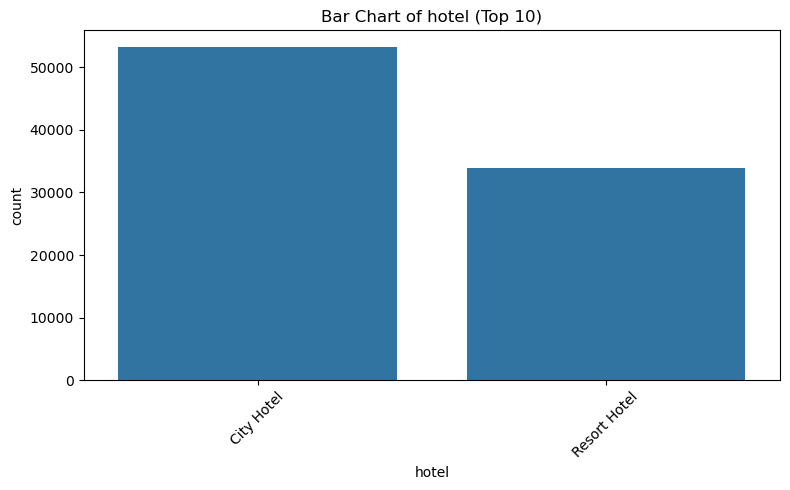

Description of is_canceled:
count    87117.000000
mean         0.272760
std          0.445381
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

Variance of is_canceled: 0.19836408764478095
IQR of is_canceled: 1.0
Skewness of is_canceled: 1.0204552030758176
Kurtosis of is_canceled: -0.9586931883676786



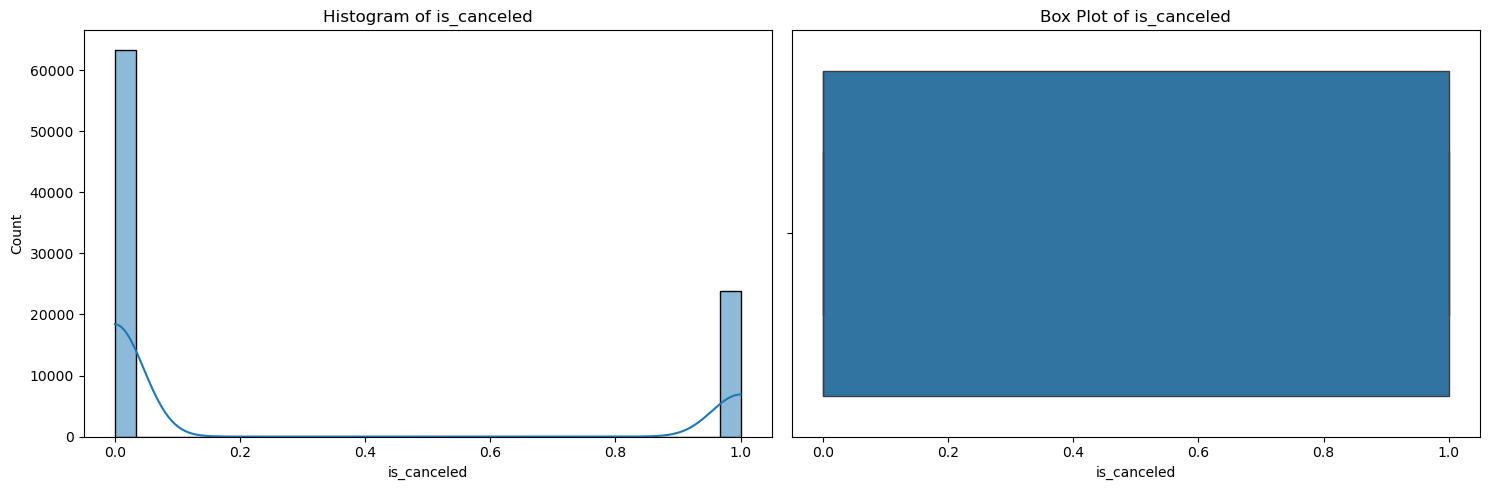

Description of lead_time:
count    87117.000000
mean        79.725105
std         85.946376
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

Variance of lead_time: 7386.779544769313
IQR of lead_time: 114.0
Skewness of lead_time: 1.433829728837057
Kurtosis of lead_time: 2.1381553590158027



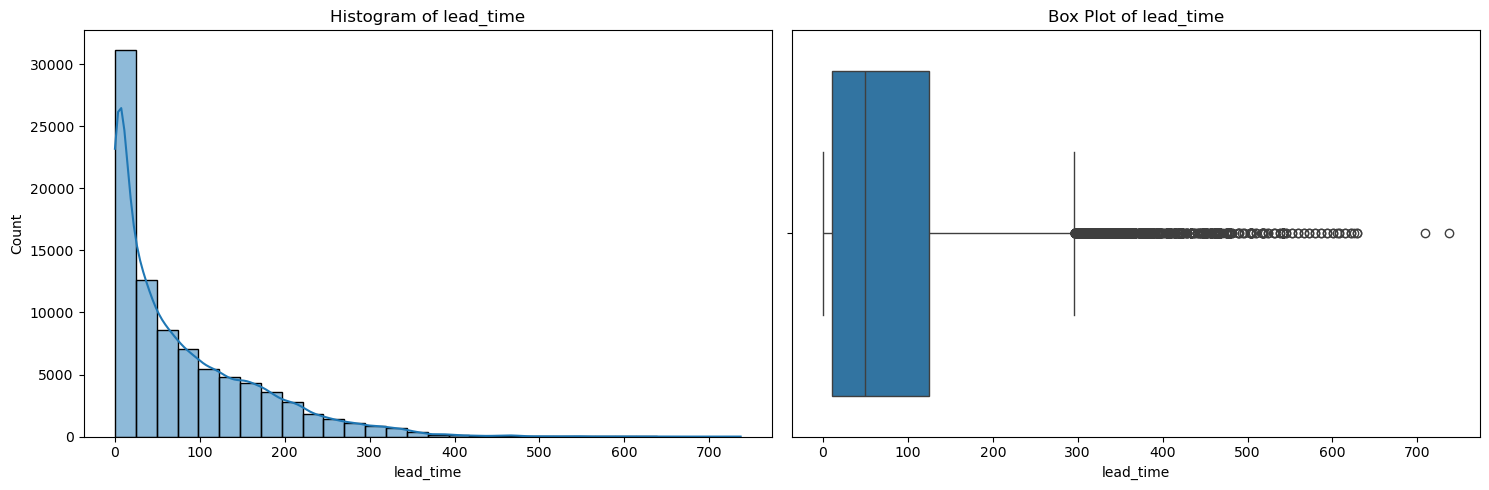

Description of arrival_date_year:
count    87117.000000
mean      2016.210567
std          0.685974
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64

Variance of arrival_date_year: 0.47056053599304054
IQR of arrival_date_year: 1.0
Skewness of arrival_date_year: -0.29747571461892985
Kurtosis of arrival_date_year: -0.8835737048457557



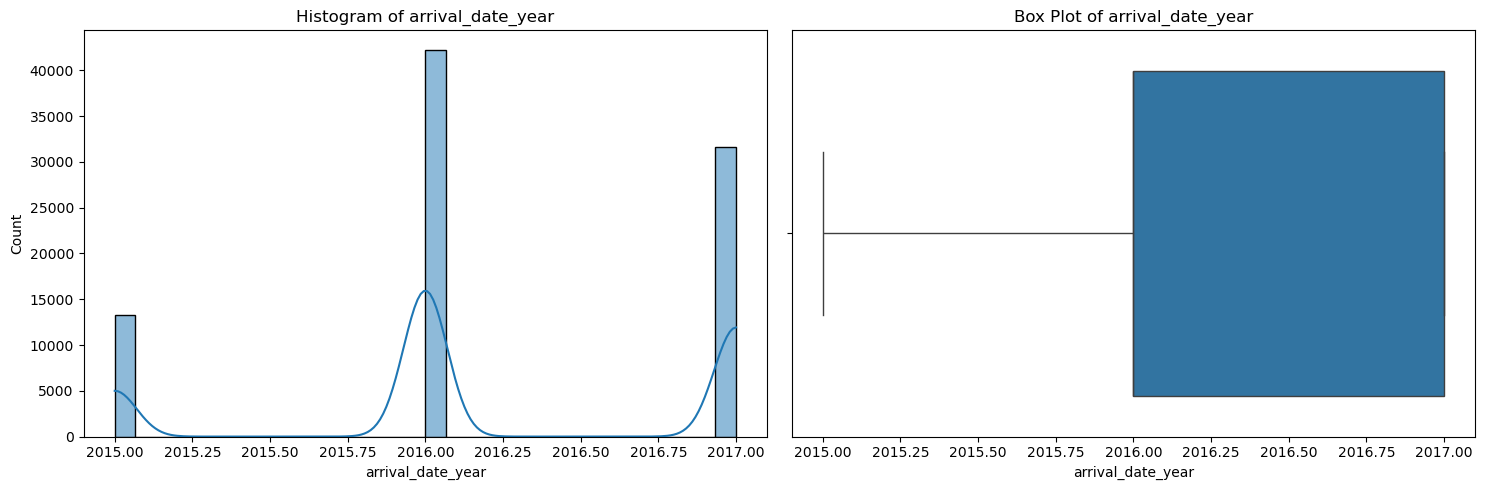

Description of arrival_date_month:
count      87117
unique        12
top       August
freq       11234
Name: arrival_date_month, dtype: object

Top 10 frequency distribution of arrival_date_month:
arrival_date_month
August       11234
July         10035
May           8315
April         7878
June          7743
March         7495
October       6911
September     6655
February      6083
December      5113
Name: count, dtype: int64



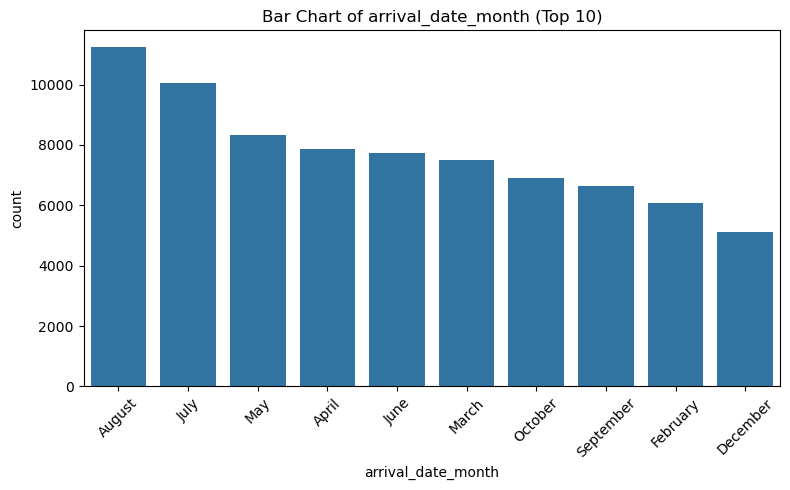

Description of arrival_date_week_number:
count    87117.000000
mean        26.835727
std         13.674535
min          1.000000
25%         16.000000
50%         27.000000
75%         37.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

Variance of arrival_date_week_number: 186.99290697832518
IQR of arrival_date_week_number: 21.0
Skewness of arrival_date_week_number: 0.022624948787099357
Kurtosis of arrival_date_week_number: -0.9523683918827142



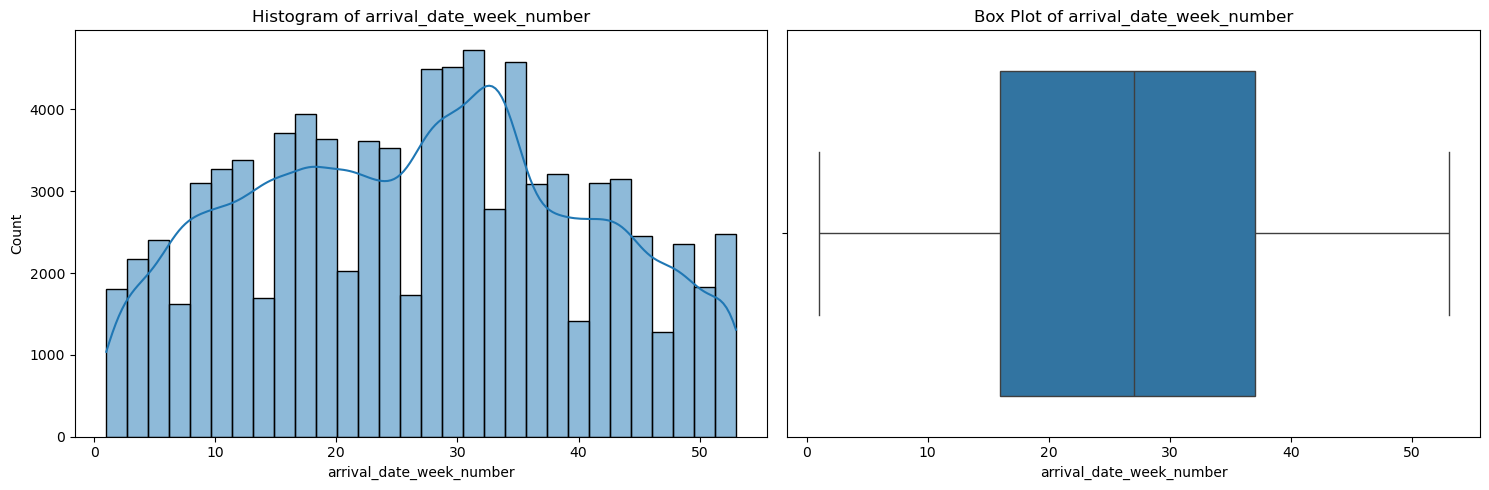

Description of arrival_date_day_of_month:
count    87117.000000
mean        15.814652
std          8.835120
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

Variance of arrival_date_day_of_month: 78.05934821099349
IQR of arrival_date_day_of_month: 15.0
Skewness of arrival_date_day_of_month: 0.0007175707768332778
Kurtosis of arrival_date_day_of_month: -1.196182517479296



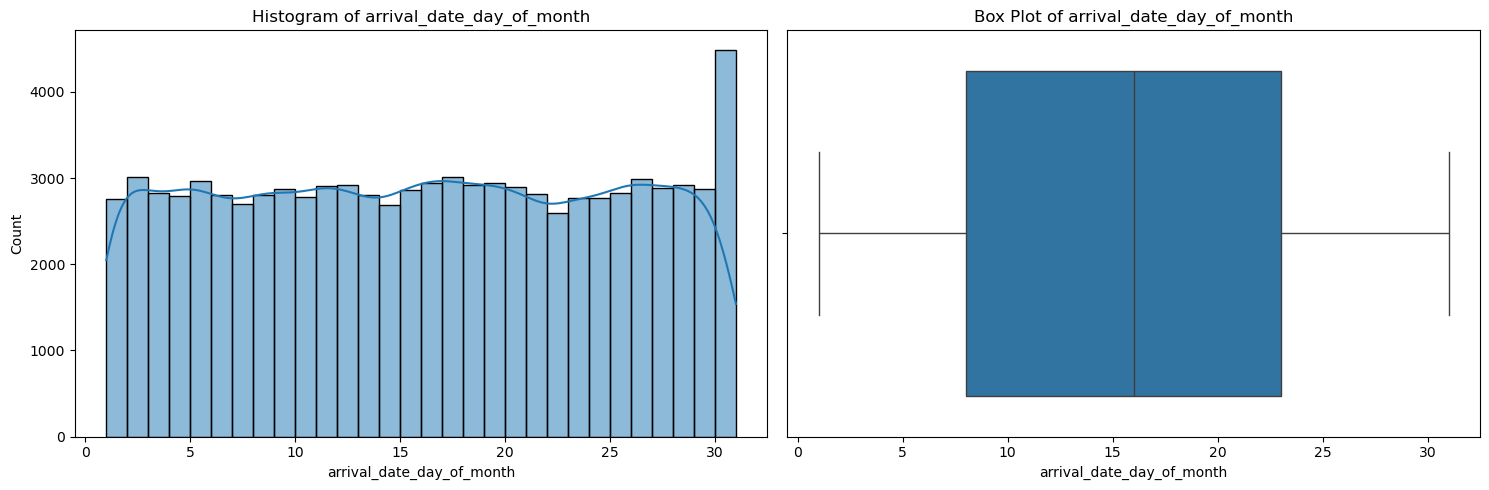

Description of stays_in_weekend_nights:
count    87117.000000
mean         1.005349
std          1.031582
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64

Variance of stays_in_weekend_nights: 1.0641616615352953
IQR of stays_in_weekend_nights: 2.0
Skewness of stays_in_weekend_nights: 1.4069506511252123
Kurtosis of stays_in_weekend_nights: 7.969138935853444



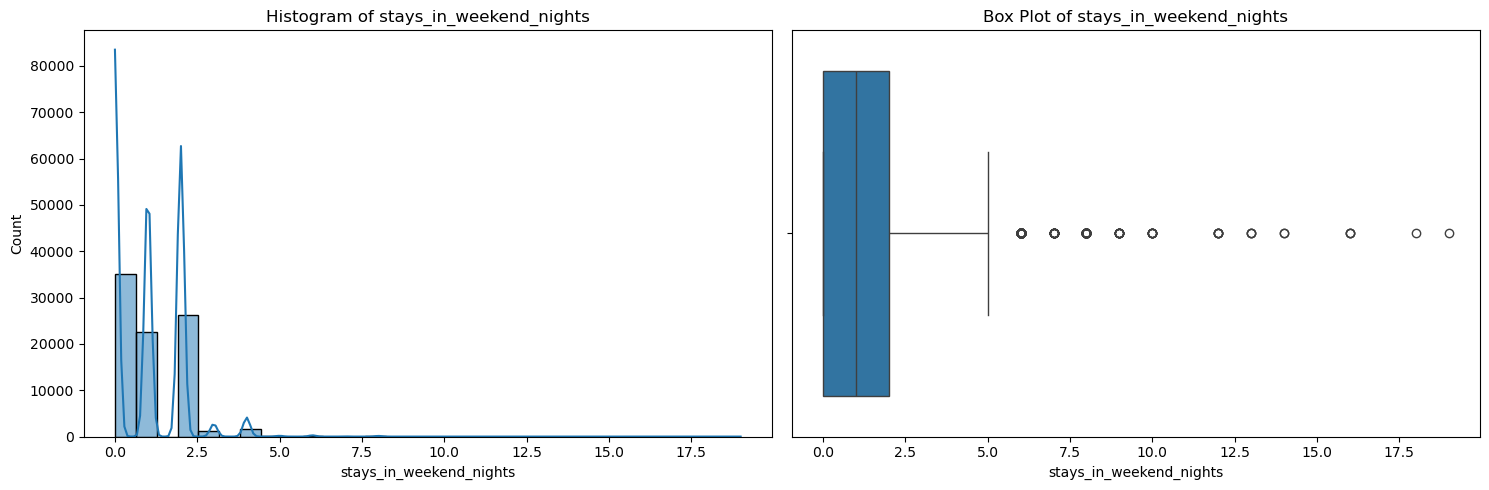

Description of stays_in_week_nights:
count    87117.000000
mean         2.625527
std          2.051695
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64

Variance of stays_in_week_nights: 4.209451237066351
IQR of stays_in_week_nights: 3.0
Skewness of stays_in_week_nights: 2.6819016788624843
Kurtosis of stays_in_week_nights: 22.067825905060253



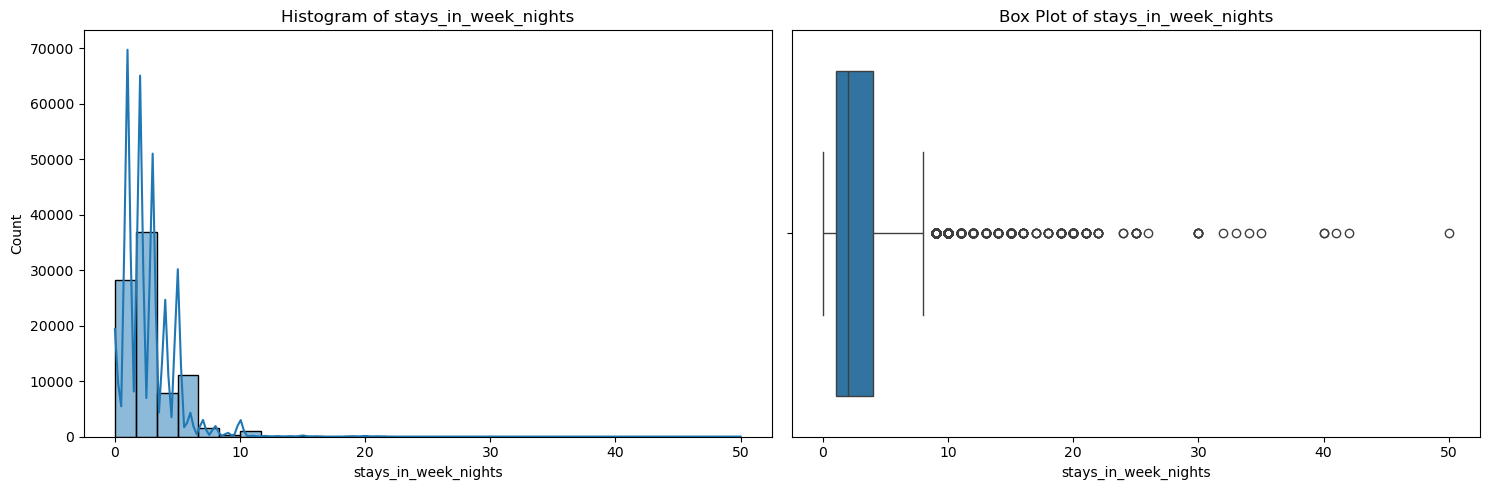

Description of adults:
count    87117.000000
mean         1.875903
std          0.626813
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

Variance of adults: 0.3928943266929762
IQR of adults: 0.0
Skewness of adults: 19.893570210777412
Kurtosis of adults: 1348.7528423547737



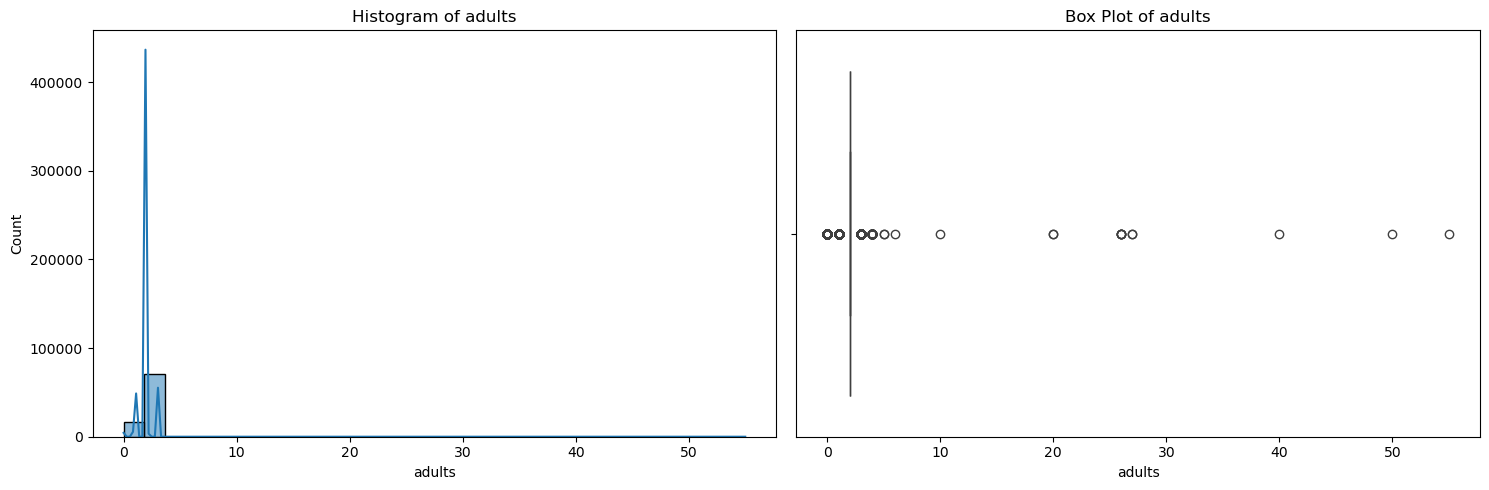

Description of children:
count    87117.000000
mean         0.138882
std          0.456253
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

Variance of children: 0.20816686197700066
IQR of children: 0.0
Skewness of children: 3.4600623255160423
Kurtosis of children: 12.930975843538963



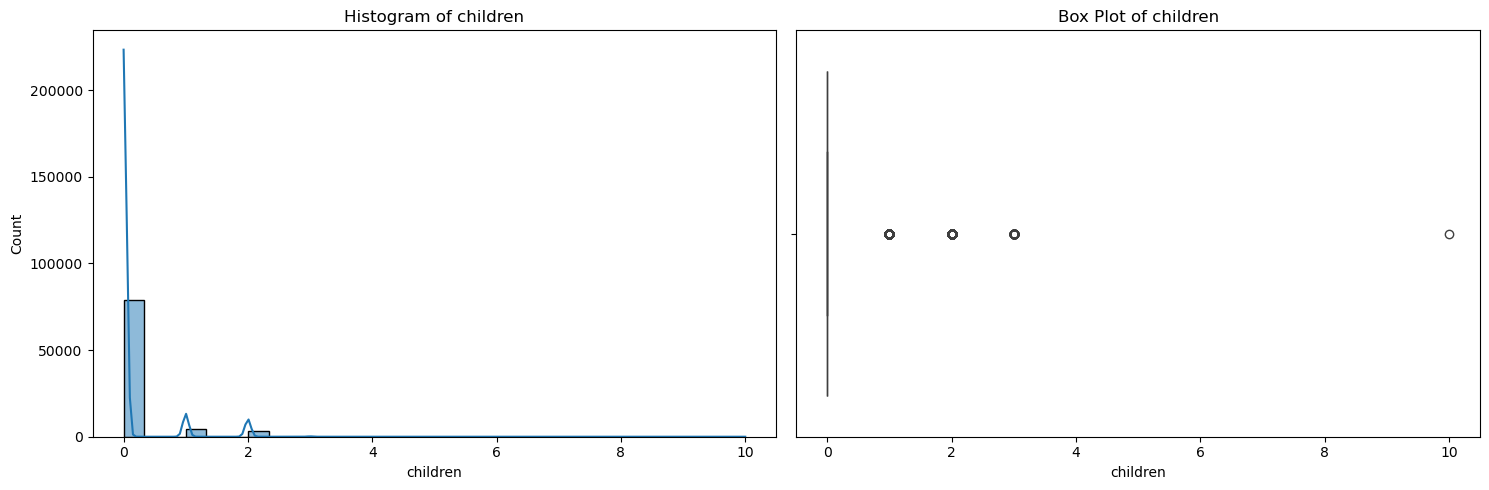

Description of babies:
count    87117.000000
mean         0.010836
std          0.113678
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64

Variance of babies: 0.012922664194443878
IQR of babies: 0.0
Skewness of babies: 21.155298160485927
Kurtosis of babies: 1205.3530710777575



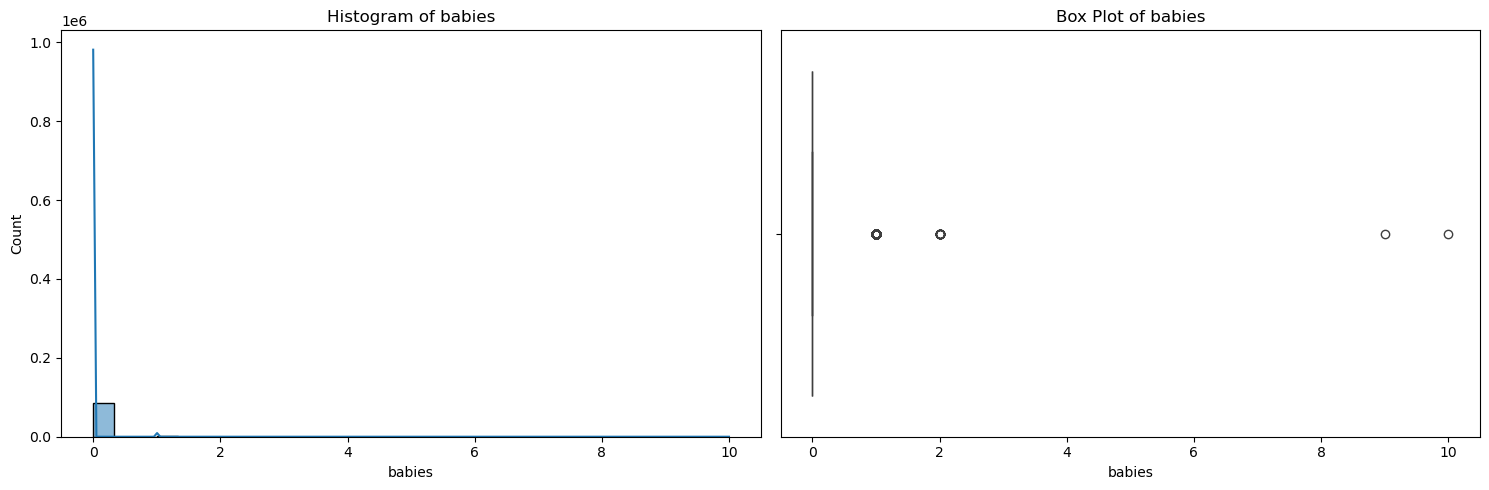

Description of meal:
count     87117
unique        5
top          BB
freq      67768
Name: meal, dtype: object

Top 10 frequency distribution of meal:
meal
BB           67768
SC            9465
HB            9047
Undefined      484
FB             353
Name: count, dtype: int64



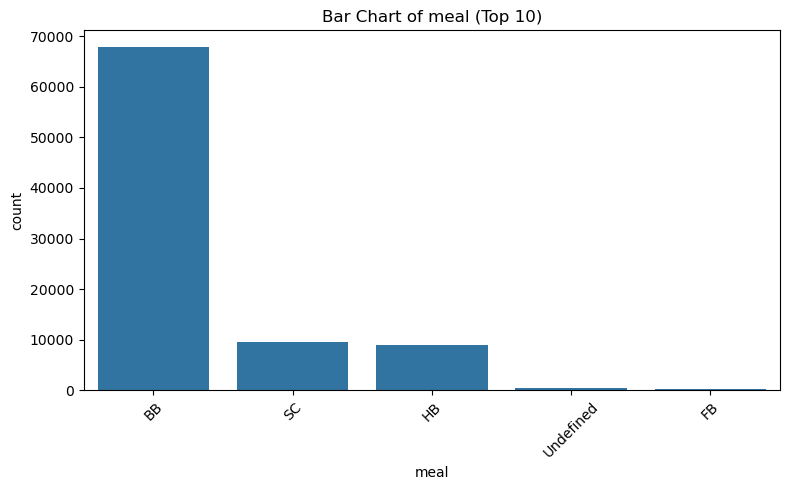

Description of country:
count     87117
unique      178
top         PRT
freq      27280
Name: country, dtype: object

Top 10 frequency distribution of country:
country
PRT    27280
GBR    10412
FRA     8830
ESP     7241
DEU     5380
ITA     3054
IRL     3007
BEL     2080
BRA     1990
NLD     1910
Name: count, dtype: int64



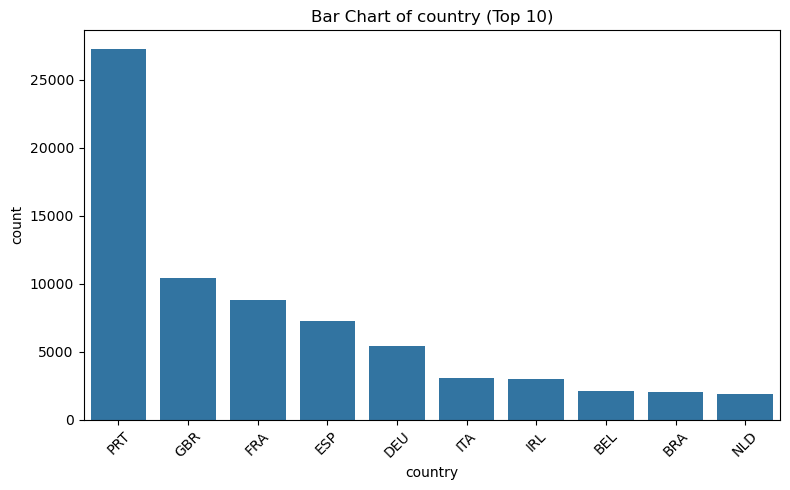

Description of market_segment:
count         87117
unique            8
top       Online TA
freq          51494
Name: market_segment, dtype: object

Top 10 frequency distribution of market_segment:
market_segment
Online TA        51494
Offline TA/TO    13837
Direct           11795
Groups            4863
Corporate         4197
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64



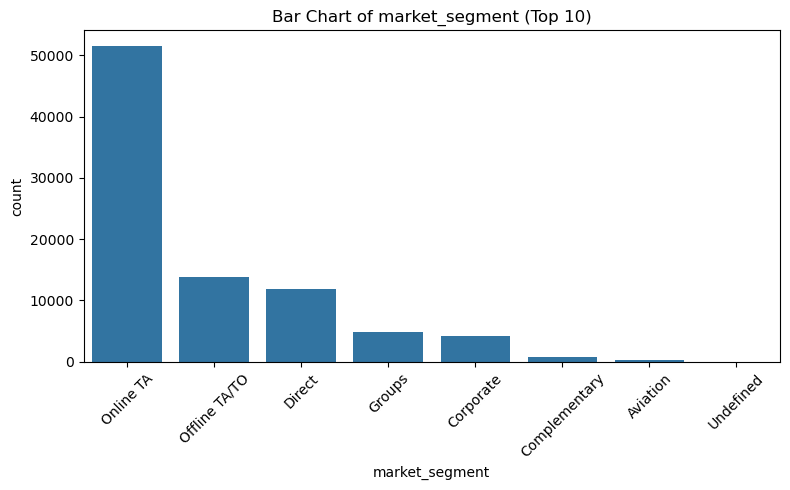

Description of distribution_channel:
count     87117
unique        5
top       TA/TO
freq      68898
Name: distribution_channel, dtype: object

Top 10 frequency distribution of distribution_channel:
distribution_channel
TA/TO        68898
Direct       12971
Corporate     5064
GDS            179
Undefined        5
Name: count, dtype: int64



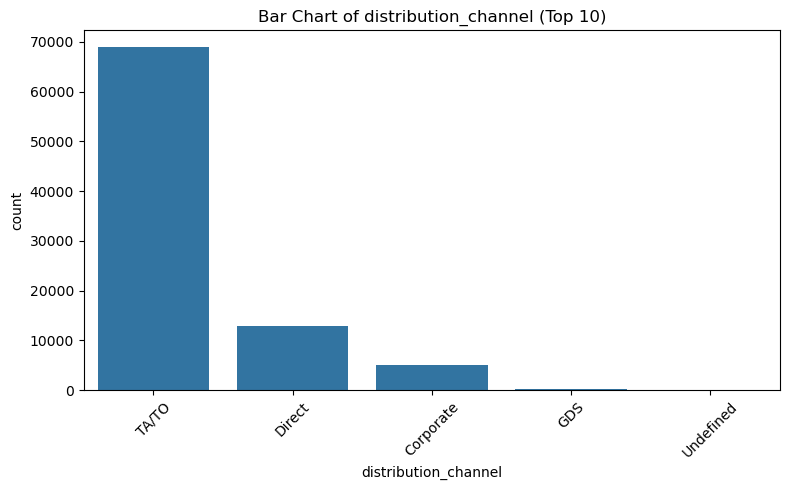

Description of is_repeated_guest:
count    87117.000000
mean         0.039189
std          0.194045
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64

Variance of is_repeated_guest: 0.03765335708373781
IQR of is_repeated_guest: 0.0
Skewness of is_repeated_guest: 4.749646156781323
Kurtosis of is_repeated_guest: 20.559610614068855



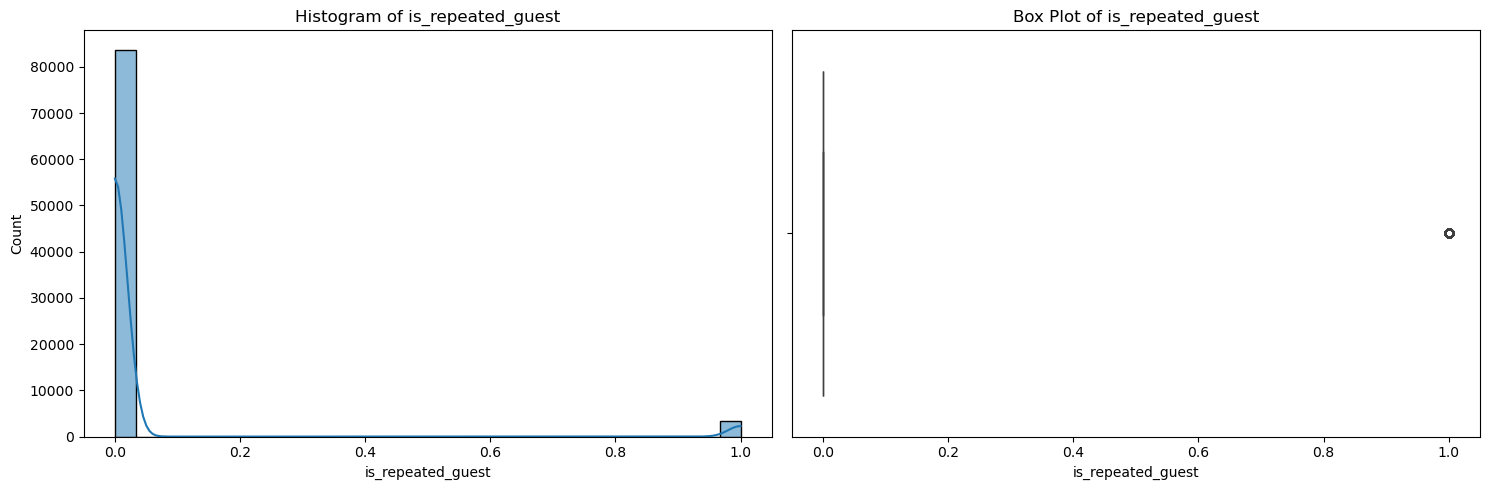

Description of previous_cancellations:
count    87117.000000
mean         0.030235
std          0.369382
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

Variance of previous_cancellations: 0.13644290923299718
IQR of previous_cancellations: 0.0
Skewness of previous_cancellations: 34.36403211982238
Kurtosis of previous_cancellations: 1727.2467697277577



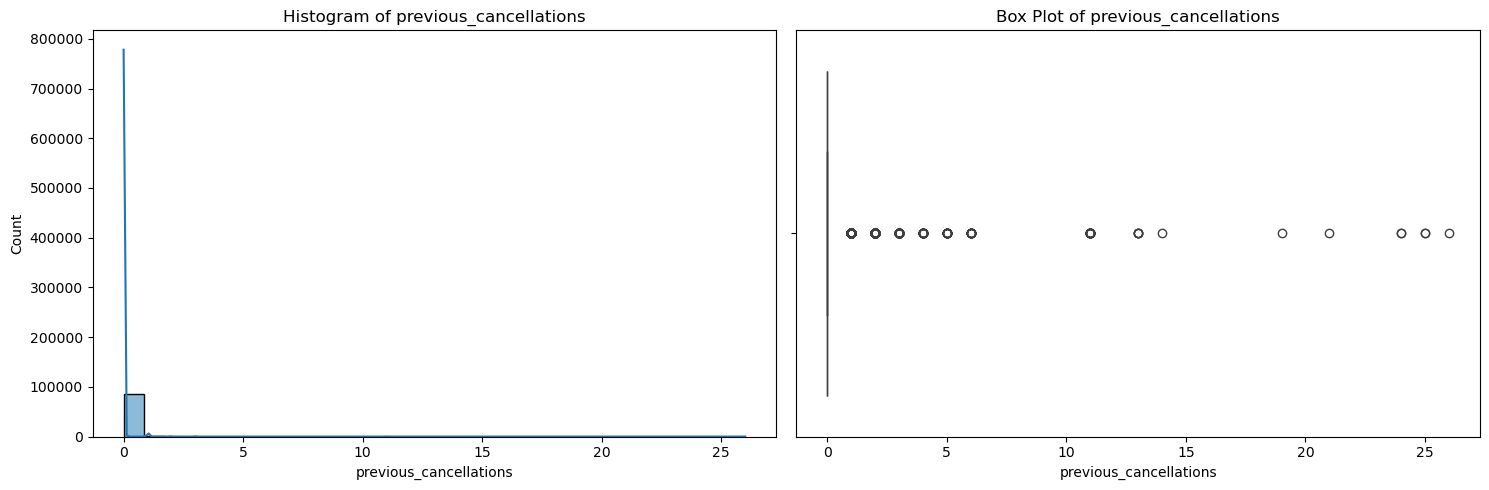

Description of previous_bookings_not_canceled:
count    87117.000000
mean         0.184579
std          1.734633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: previous_bookings_not_canceled, dtype: float64

Variance of previous_bookings_not_canceled: 3.0089531648670356
IQR of previous_bookings_not_canceled: 0.0
Skewness of previous_bookings_not_canceled: 20.427134974988796
Kurtosis of previous_bookings_not_canceled: 577.5529932266863



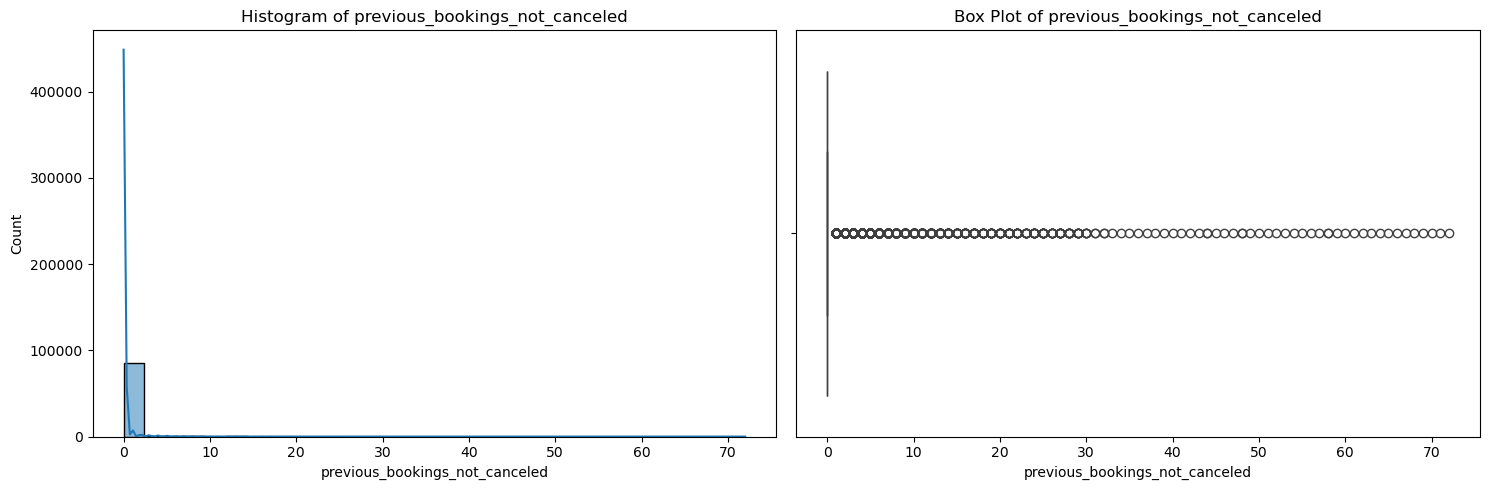

Description of reserved_room_type:
count     87117
unique       10
top           A
freq      56325
Name: reserved_room_type, dtype: object

Top 10 frequency distribution of reserved_room_type:
reserved_room_type
A    56325
D    17364
E     6037
F     2821
G     2049
B      999
C      914
H      596
L        6
P        6
Name: count, dtype: int64



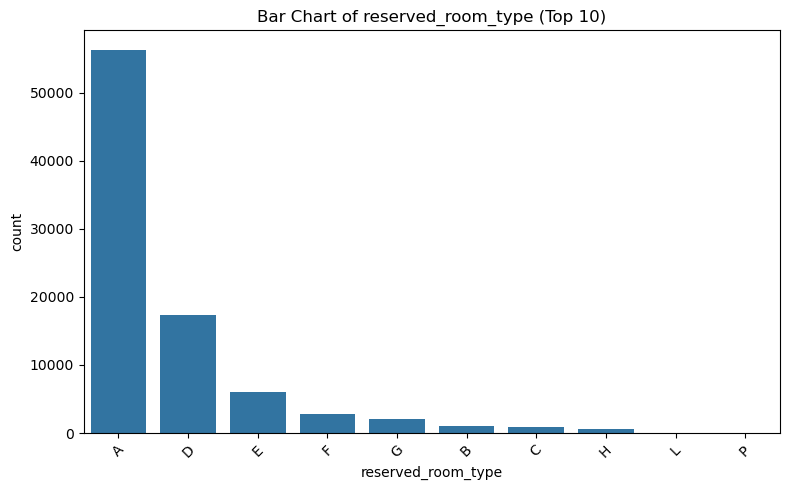

Description of assigned_room_type:
count     87117
unique       12
top           A
freq      46094
Name: assigned_room_type, dtype: object

Top 10 frequency distribution of assigned_room_type:
assigned_room_type
A    46094
D    22393
E     7184
F     3624
G     2495
C     2163
B     1818
H      706
I      357
K      276
Name: count, dtype: int64



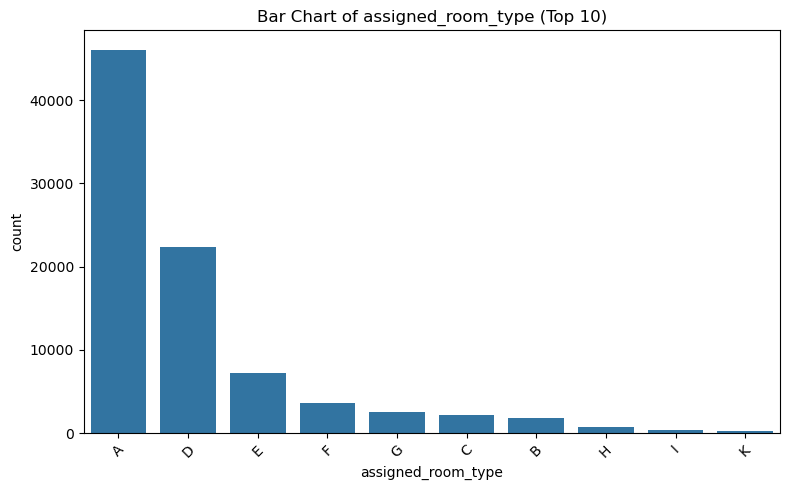

Description of booking_changes:
count    87117.000000
mean         0.272266
std          0.728008
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: booking_changes, dtype: float64

Variance of booking_changes: 0.5299958901050666
IQR of booking_changes: 0.0
Skewness of booking_changes: 5.540617792409705
Kurtosis of booking_changes: 67.50414618003019



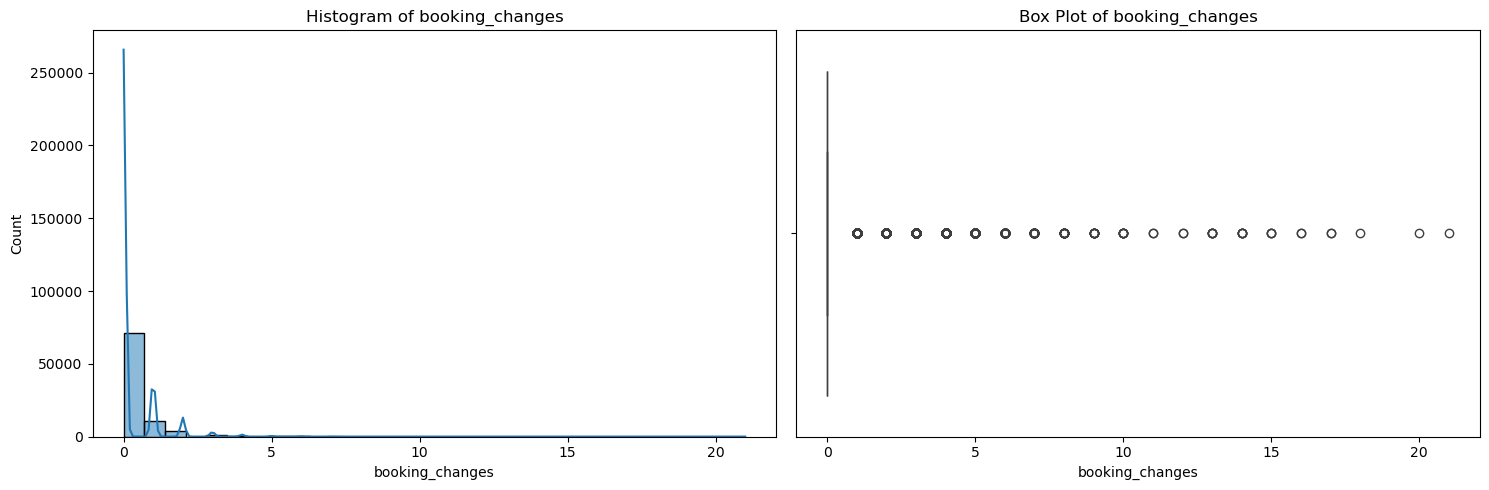

Description of deposit_type:
count          87117
unique             3
top       No Deposit
freq           85993
Name: deposit_type, dtype: object

Top 10 frequency distribution of deposit_type:
deposit_type
No Deposit    85993
Non Refund     1017
Refundable      107
Name: count, dtype: int64



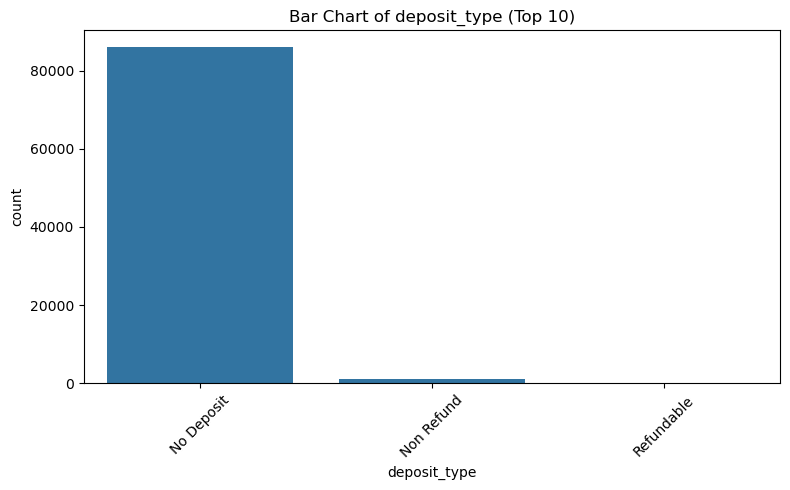

Description of days_in_waiting_list:
count    87117.000000
mean         0.731935
std          9.866338
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

Variance of days_in_waiting_list: 97.34463110150412
IQR of days_in_waiting_list: 0.0
Skewness of days_in_waiting_list: 19.724553389697366
Kurtosis of days_in_waiting_list: 499.616914994632



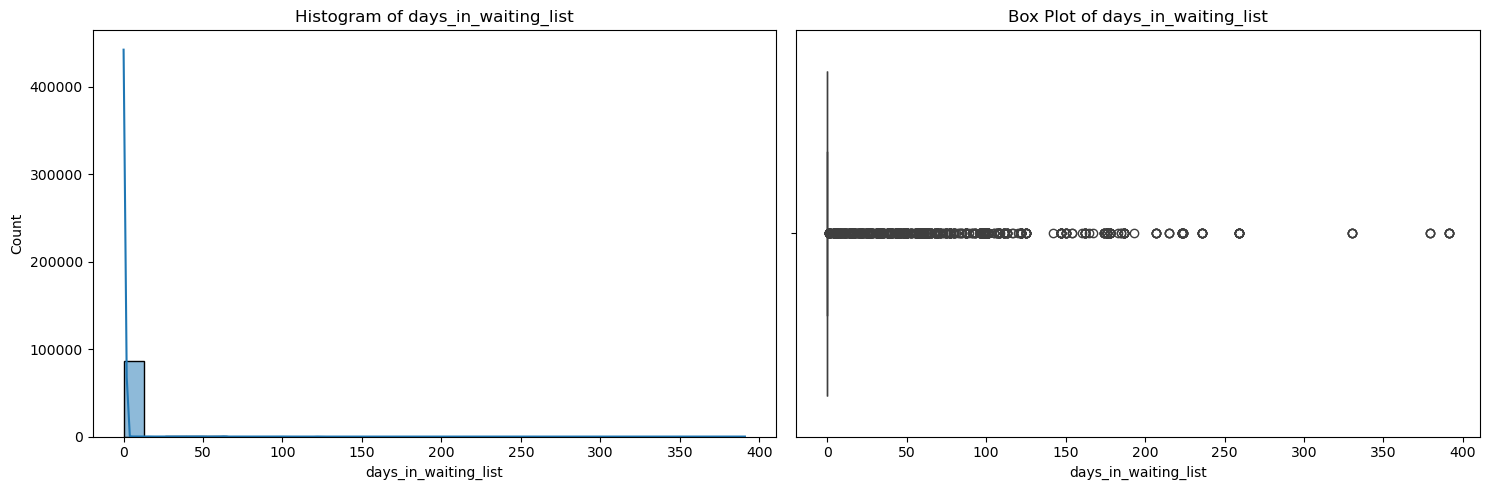

Description of customer_type:
count         87117
unique            4
top       Transient
freq          71839
Name: customer_type, dtype: object

Top 10 frequency distribution of customer_type:
customer_type
Transient          71839
Transient-Party    11596
Contract            3138
Group                544
Name: count, dtype: int64



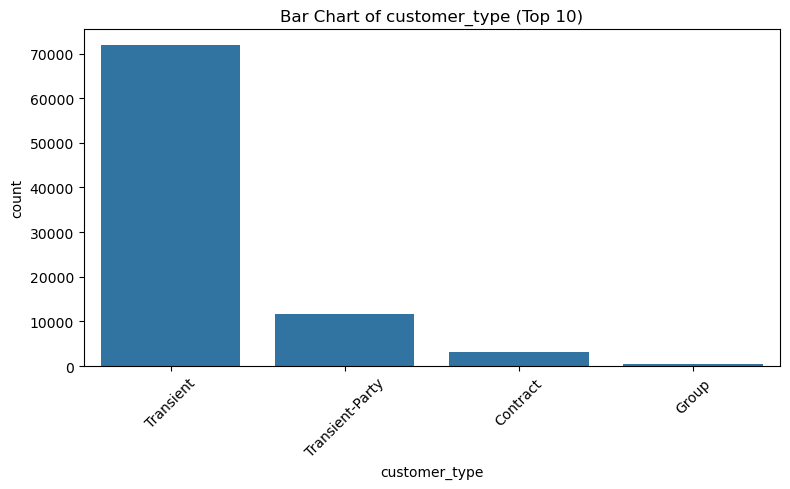

Description of adr:
count    87117.000000
mean       106.367090
std         55.046352
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

Variance of adr: 3030.1008236182597
IQR of adr: 62.0
Skewness of adr: 10.934696413987819
Kurtosis of adr: 982.4221495046072



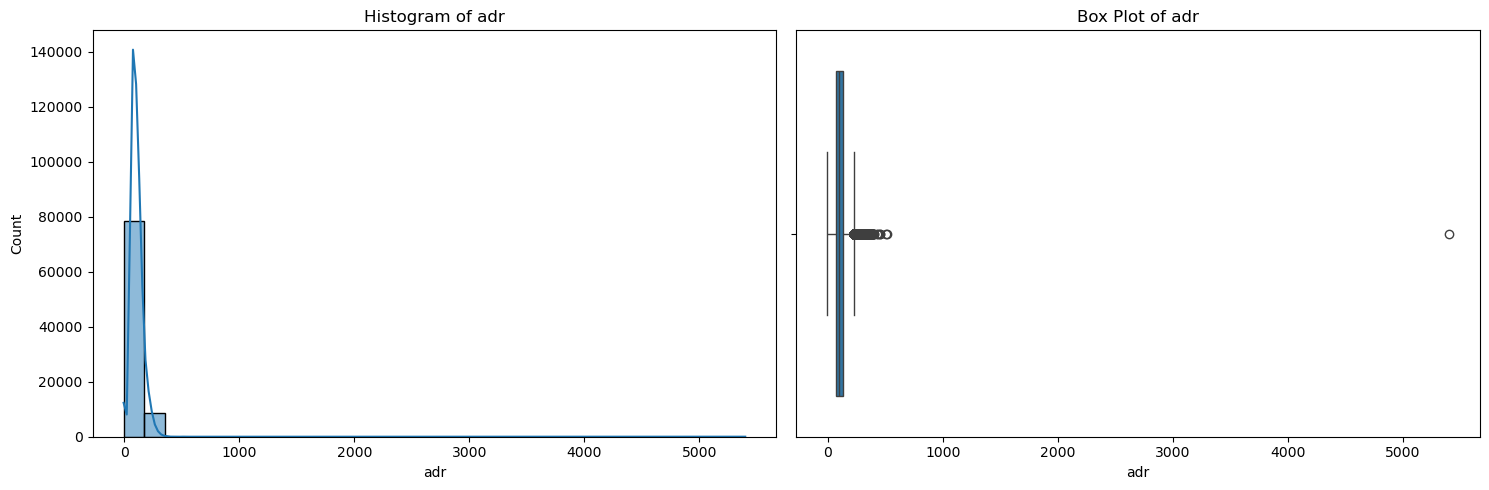

Description of required_car_parking_spaces:
count    87117.000000
mean         0.084496
std          0.281943
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

Variance of required_car_parking_spaces: 0.07949203541863105
IQR of required_car_parking_spaces: 0.0
Skewness of required_car_parking_spaces: 3.483390649587448
Kurtosis of required_car_parking_spaces: 21.640394373627196



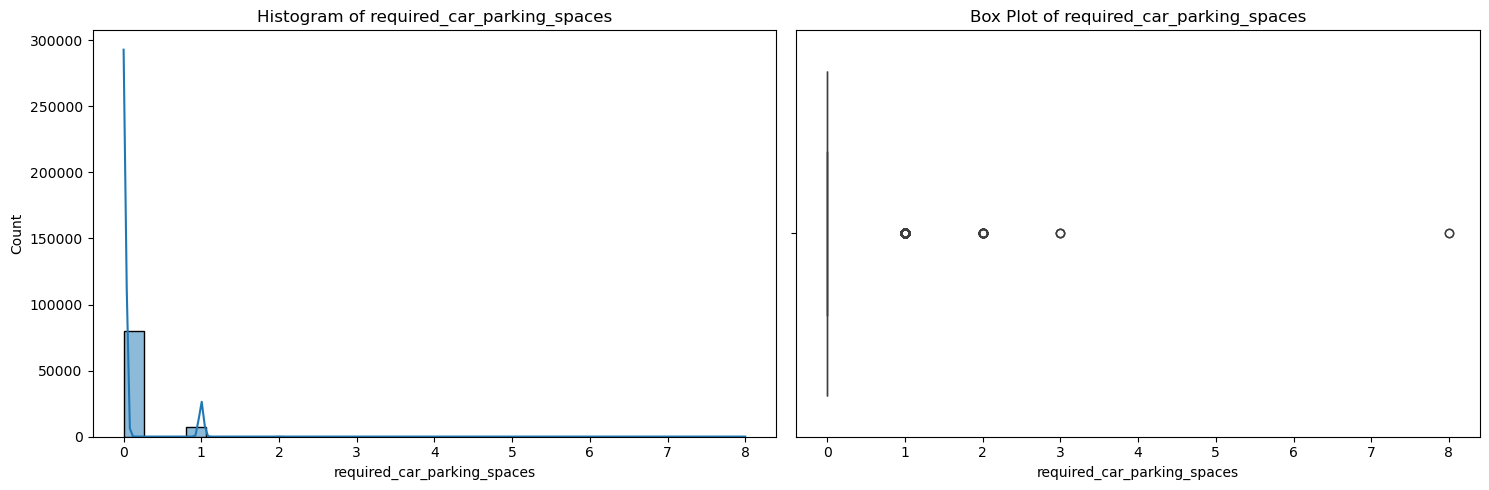

Description of total_of_special_requests:
count    87117.000000
mean         0.699955
std          0.832237
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

Variance of total_of_special_requests: 0.69261823115661
IQR of total_of_special_requests: 1.0
Skewness of total_of_special_requests: 1.0807370599668256
Kurtosis of total_of_special_requests: 0.816713139160361



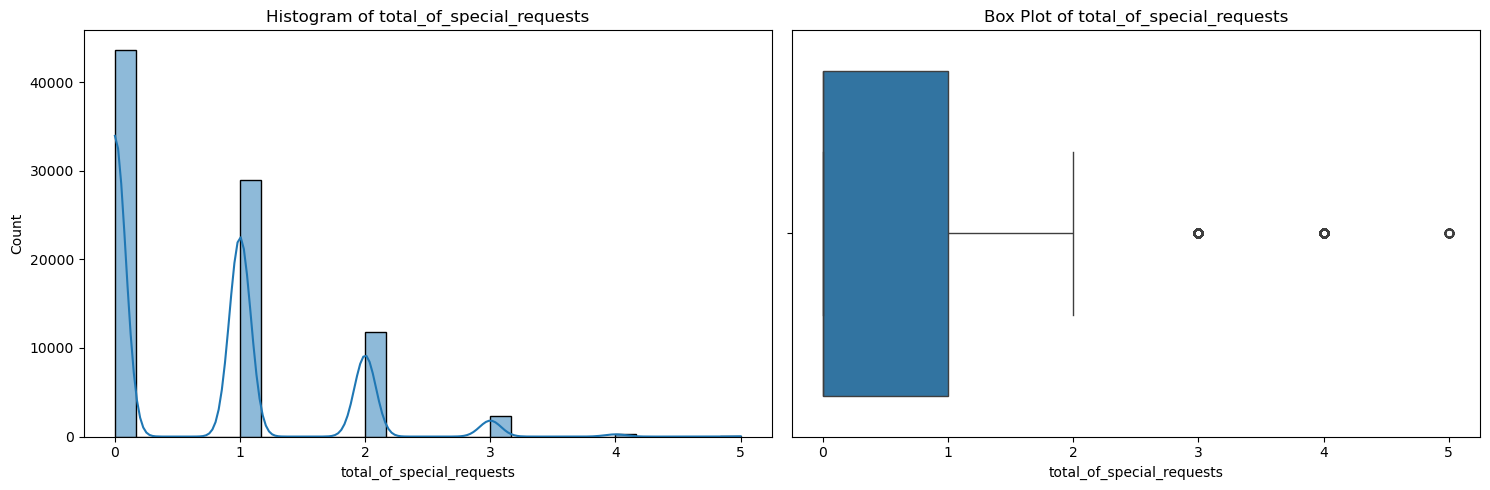

Description of origin_reservasion:
count     87117
unique        3
top       agent
freq      74962
Name: origin_reservasion, dtype: object

Top 10 frequency distribution of origin_reservasion:
origin_reservasion
agent      74962
himself     7100
company     5055
Name: count, dtype: int64



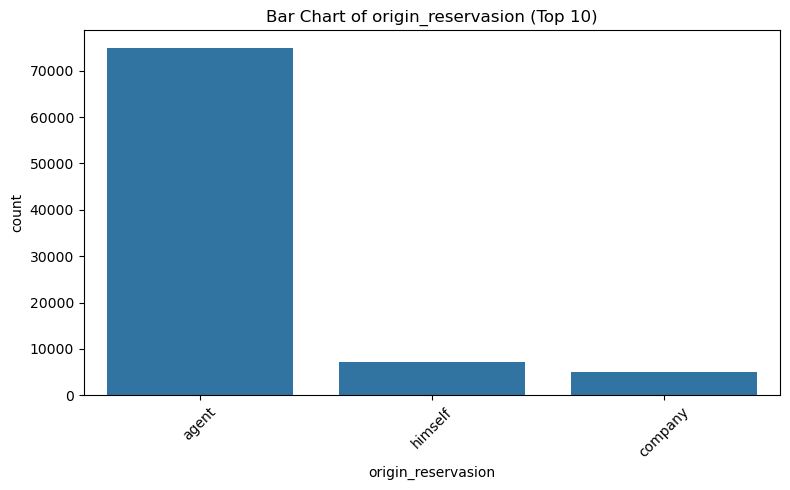

Description of room_type_match:
count    87117.000000
mean         0.849628
std          0.357438
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: room_type_match, dtype: float64

Variance of room_type_match: 0.12776206911220978
IQR of room_type_match: 0.0
Skewness of room_type_match: -1.956341186209436
Kurtosis of room_type_match: 1.8273127871062473



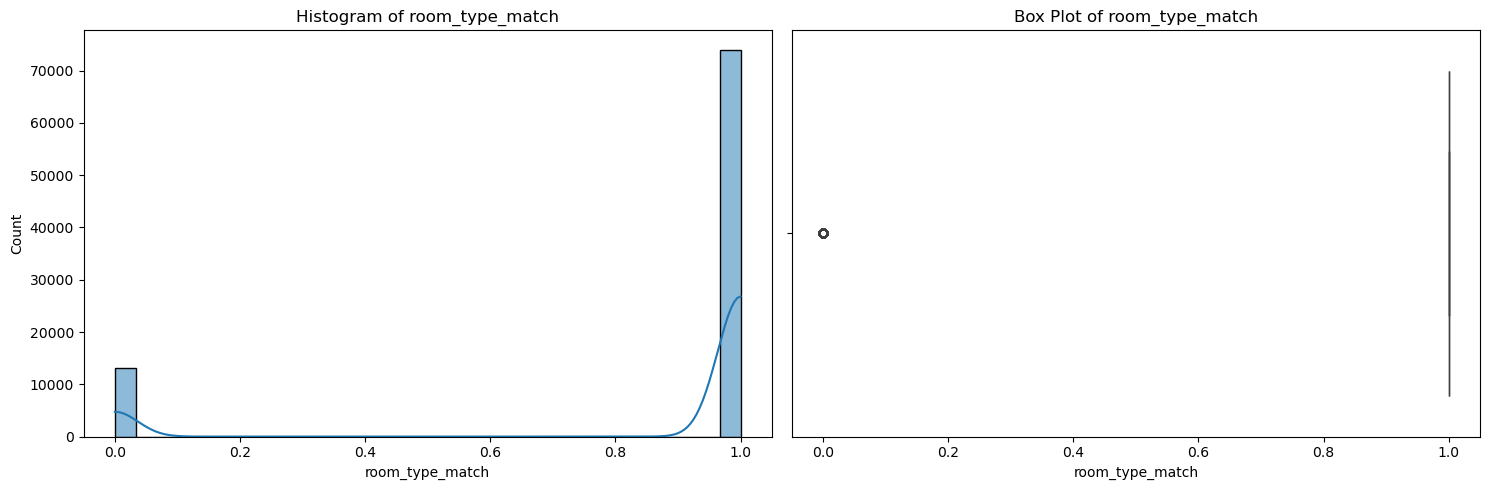

In [10]:
def univariate_analysis(data, column_name):
    describe = data[column_name].describe()
    print(f"Description of {column_name}:\n{describe}\n")

    if pd.api.types.is_numeric_dtype(data[column_name]):
        # Calculate statistics for numeric data
        variance_value = data[column_name].var()
        iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
        skewness_value = data[column_name].skew()
        kurtosis_value = data[column_name].kurtosis()
        
        print(f"Variance of {column_name}: {variance_value}")
        print(f"IQR of {column_name}: {iqr_value}")
        print(f"Skewness of {column_name}: {skewness_value}")
        print(f"Kurtosis of {column_name}: {kurtosis_value}\n")

        # Histogram and Box Plot for numeric data
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 2, 1)
        sns.histplot(data[column_name], kde=True, bins=30)
        plt.title(f'Histogram of {column_name}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column_name])
        plt.title(f'Box Plot of {column_name}')
        
        plt.tight_layout()
        plt.show()

    else:
        # Frequency distribution and Bar Chart for categorical data
        frequency_distribution = data[column_name].value_counts().head(10)
        print(f"Top 10 frequency distribution of {column_name}:\n{frequency_distribution}\n")

        plt.figure(figsize=(8, 5))
        sns.countplot(x=data[column_name], order=frequency_distribution.index)
        plt.title(f'Bar Chart of {column_name} (Top 10)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Analyze each variable
variables_to_analyse = data.columns
for variable in variables_to_analyse:
    univariate_analysis(data, variable)


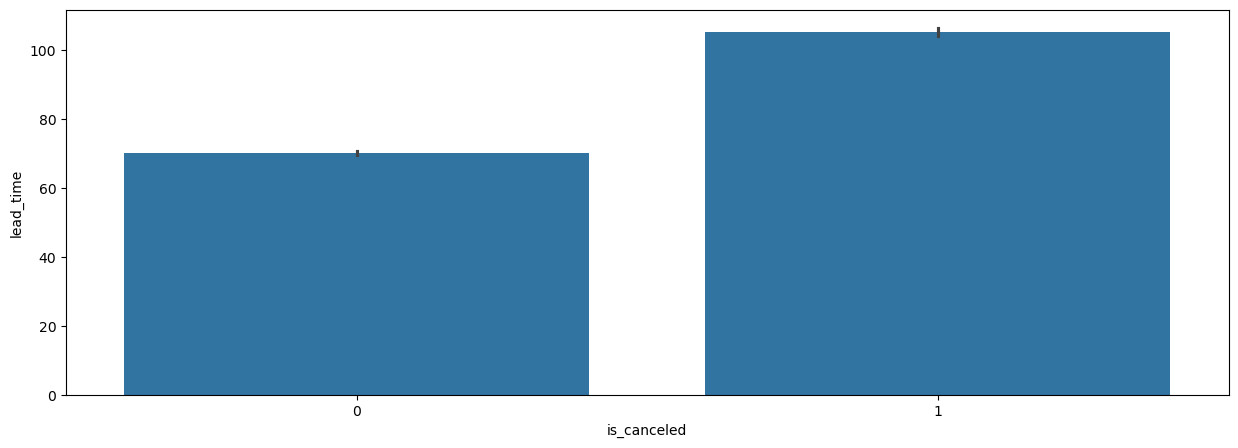

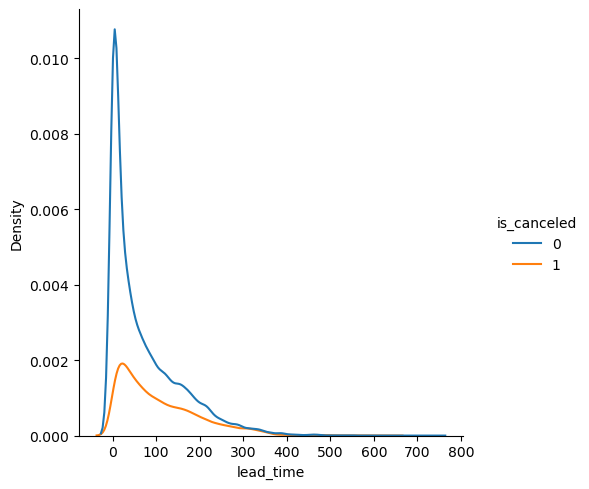

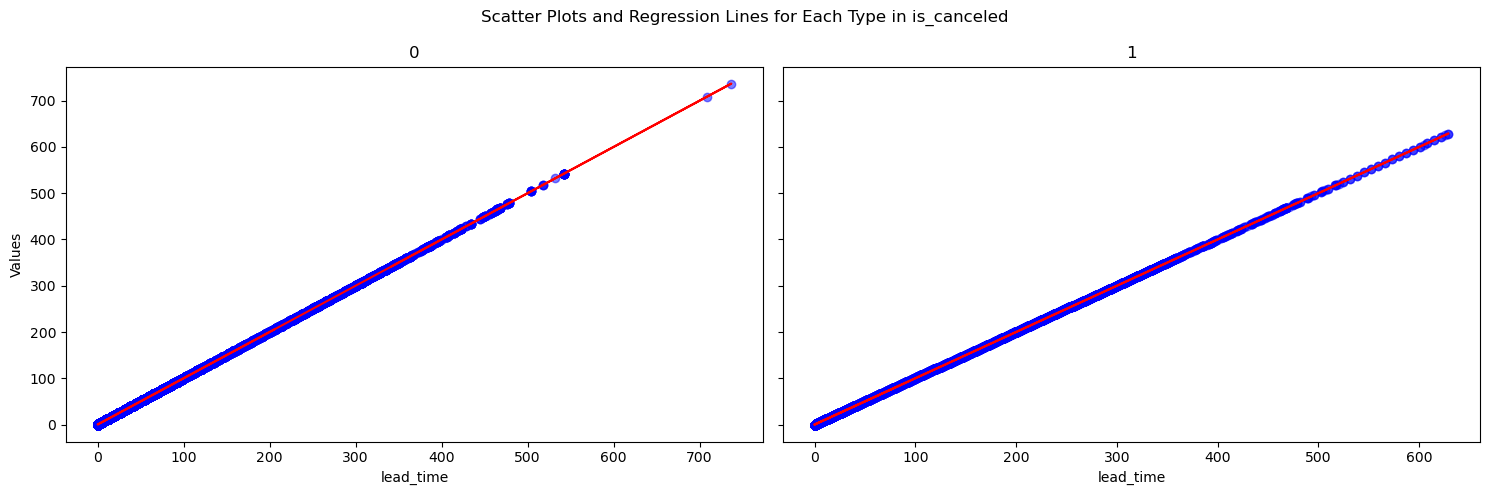

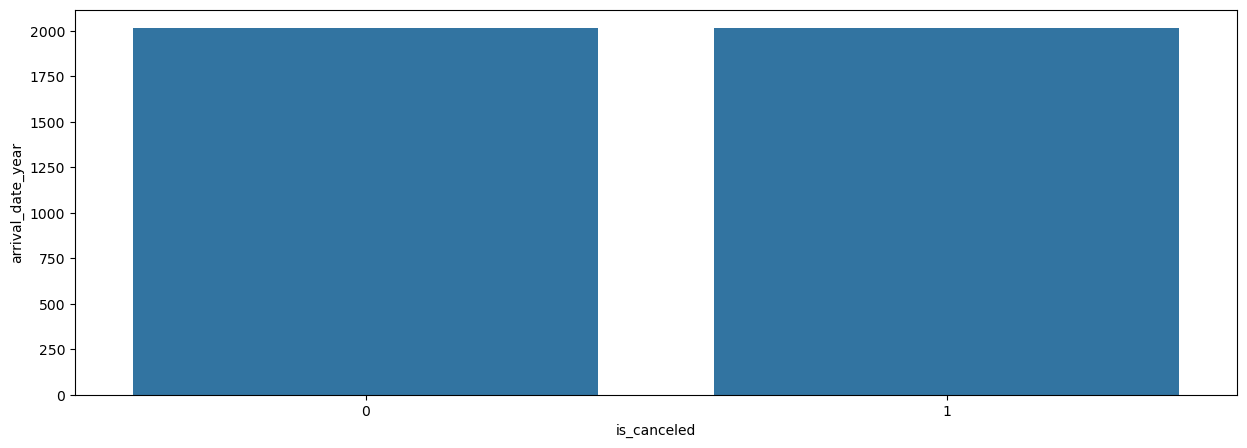

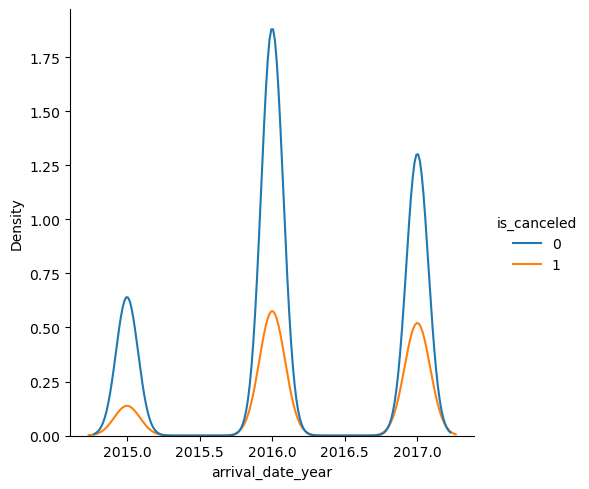

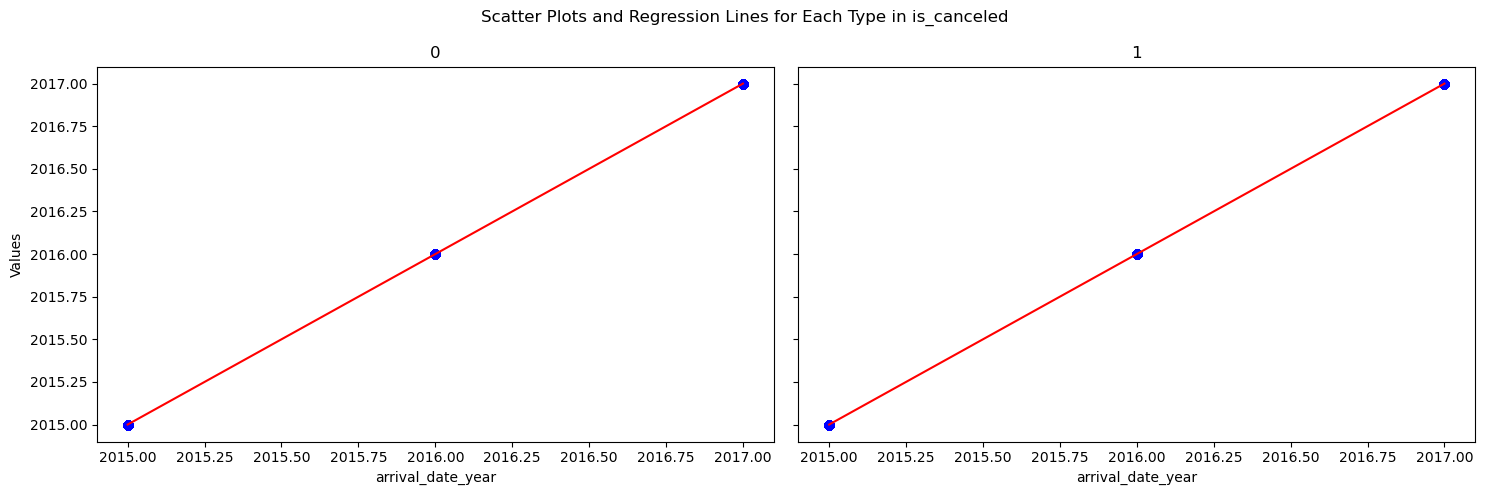

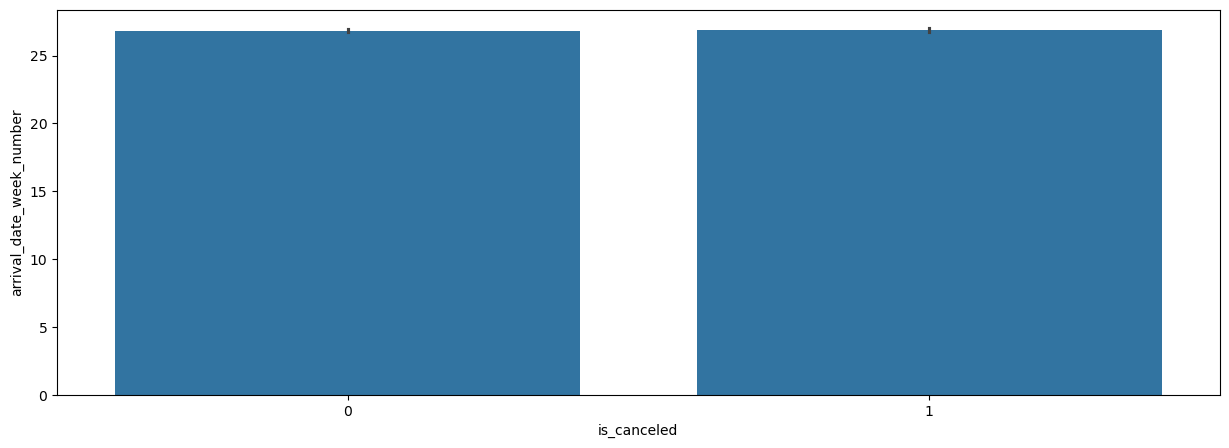

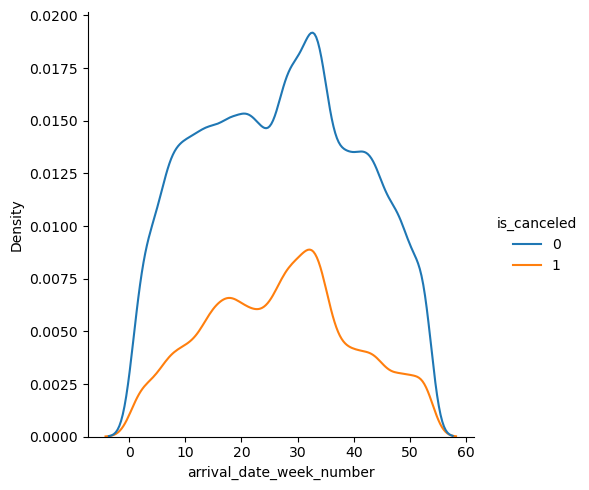

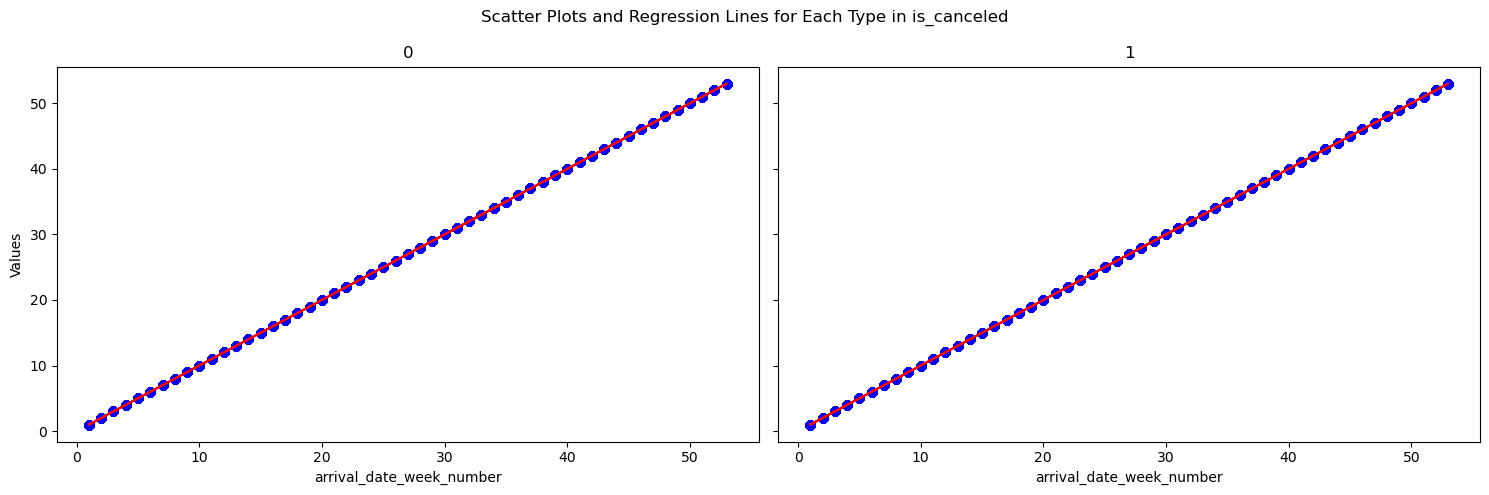

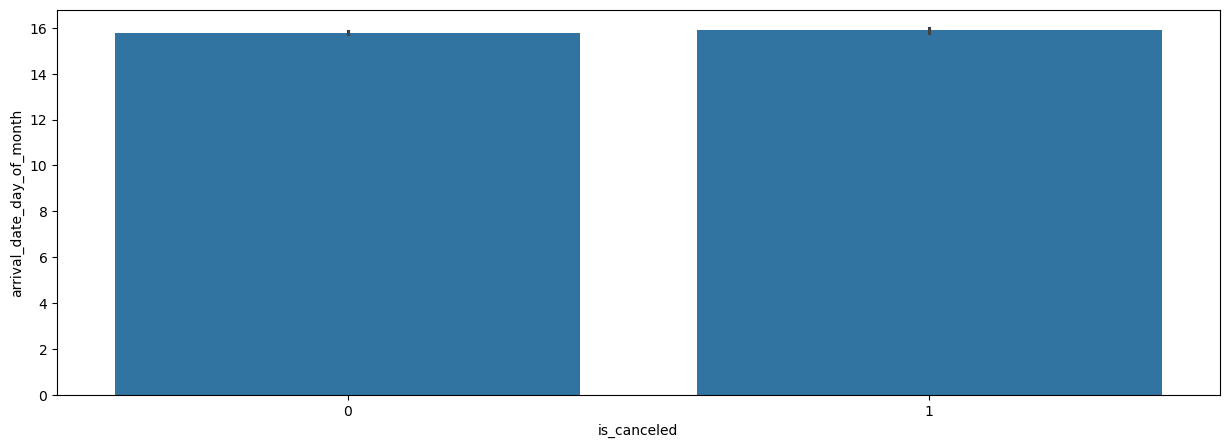

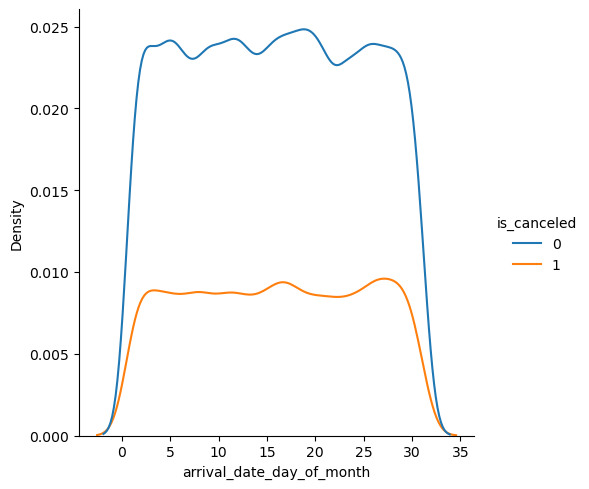

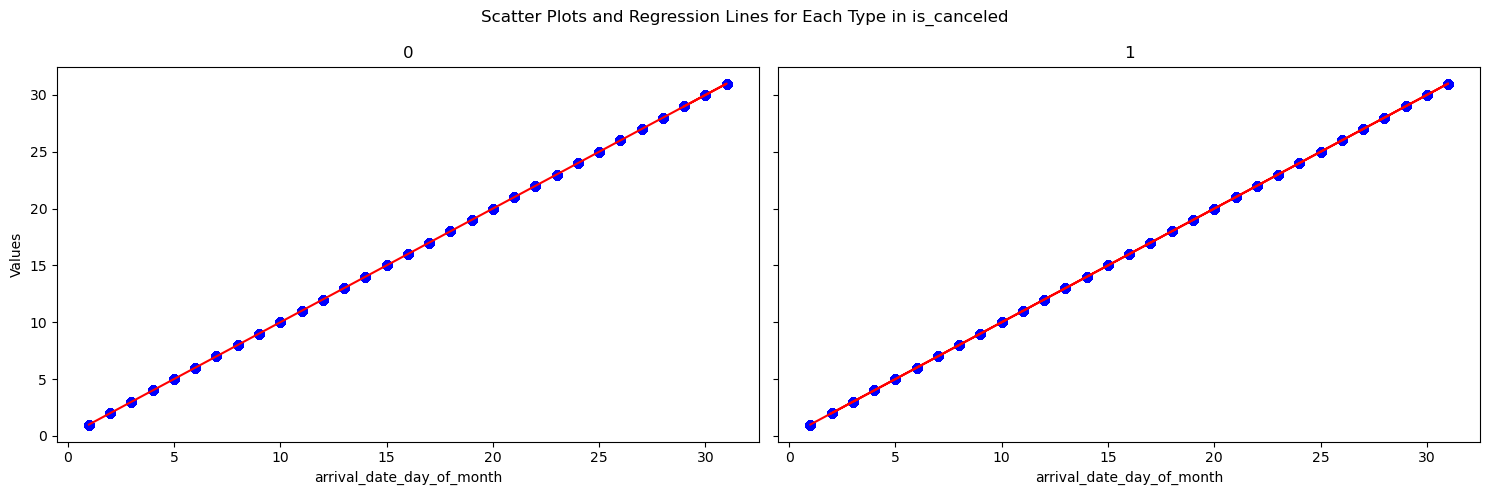

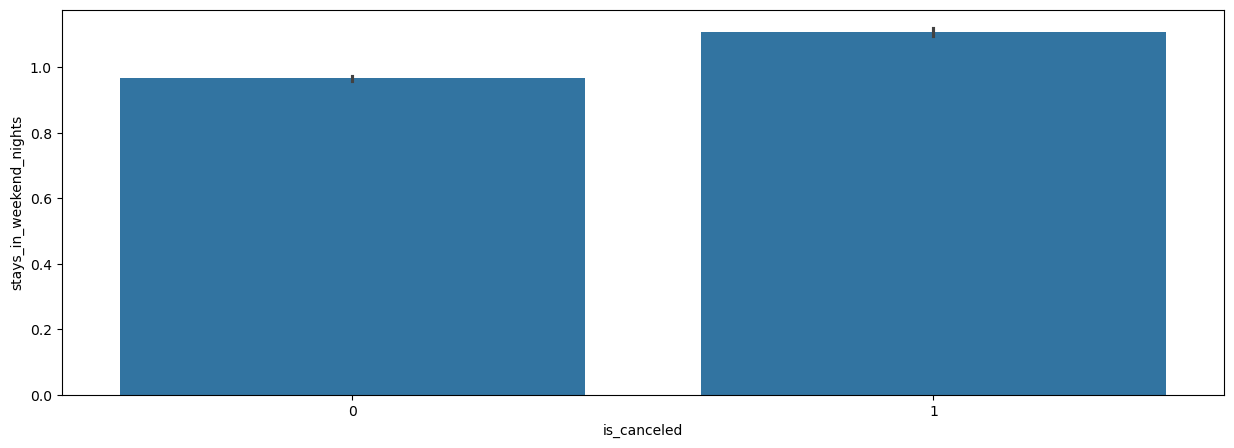

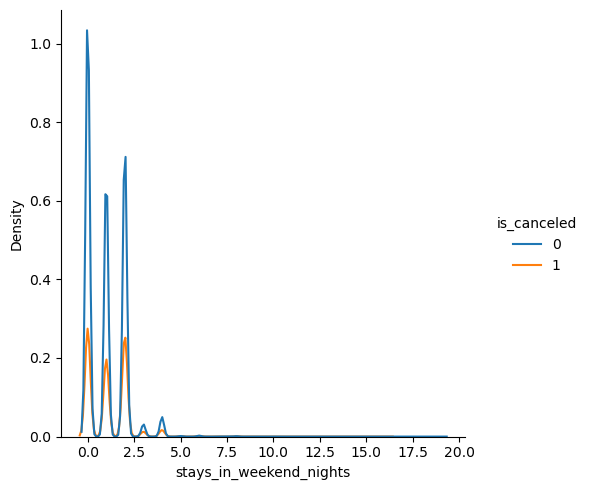

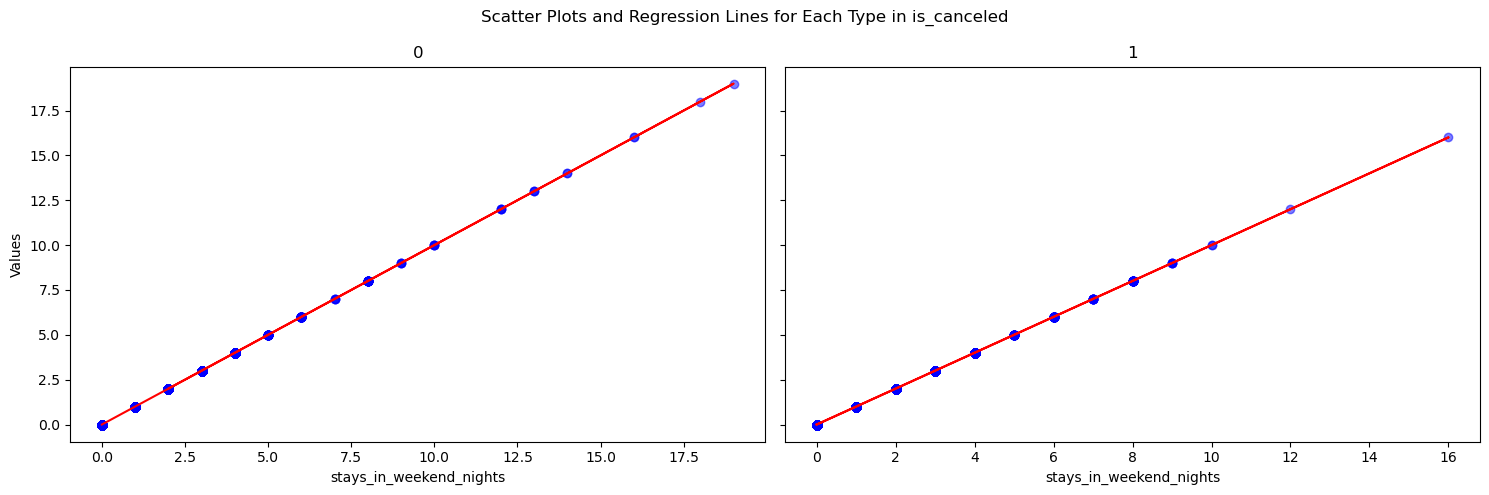

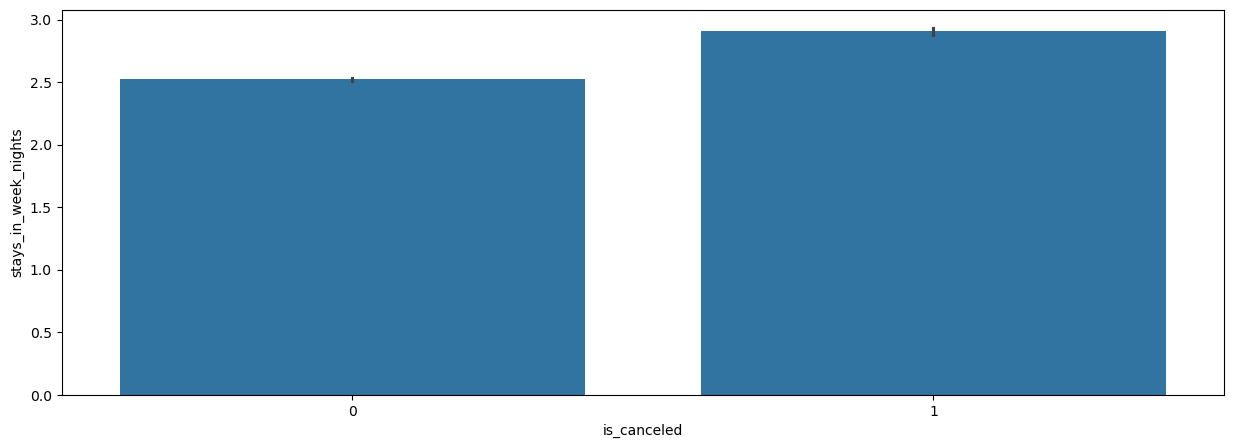

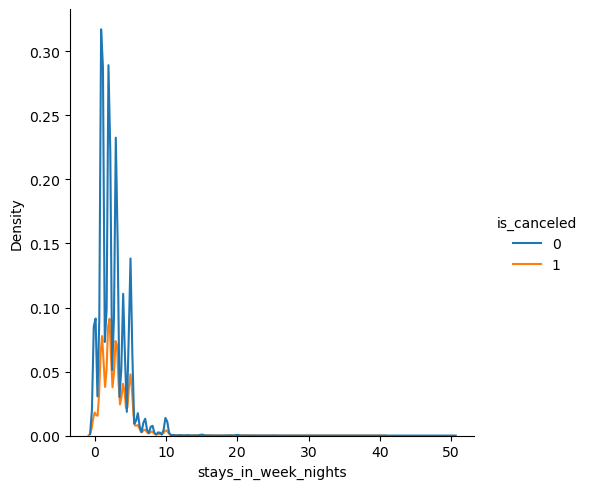

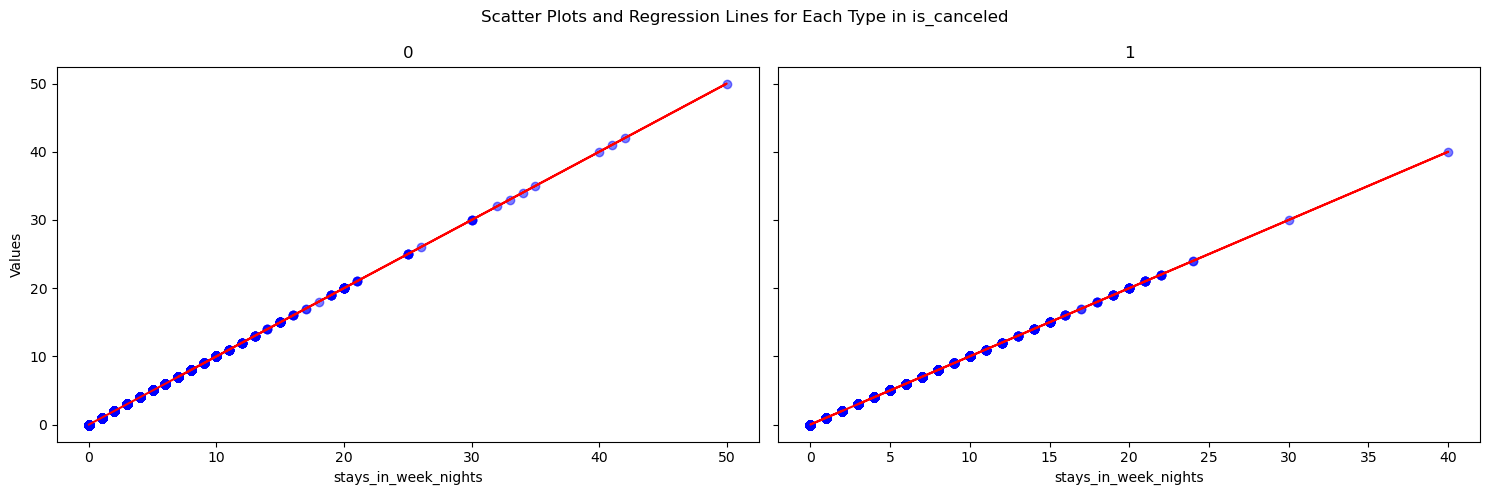

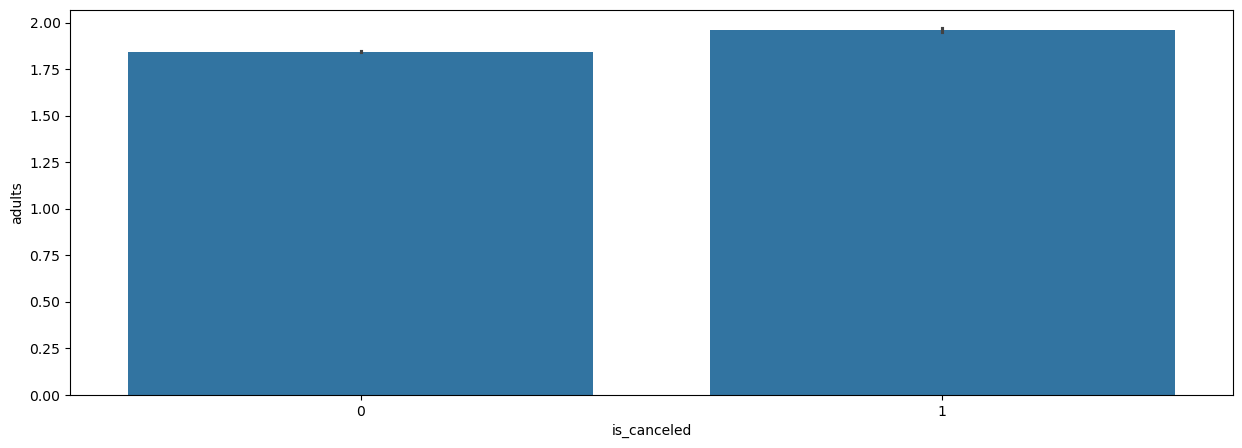

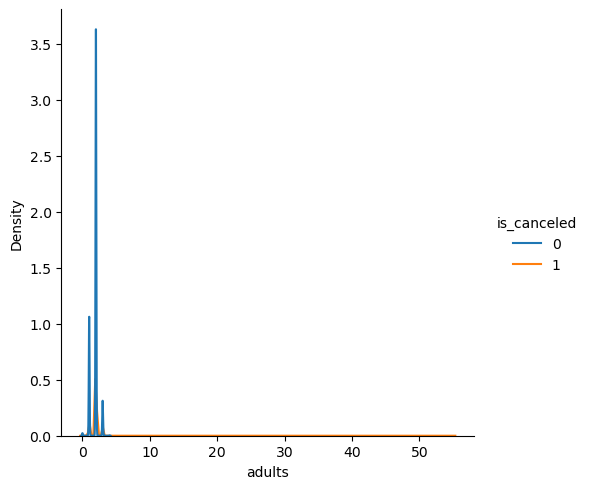

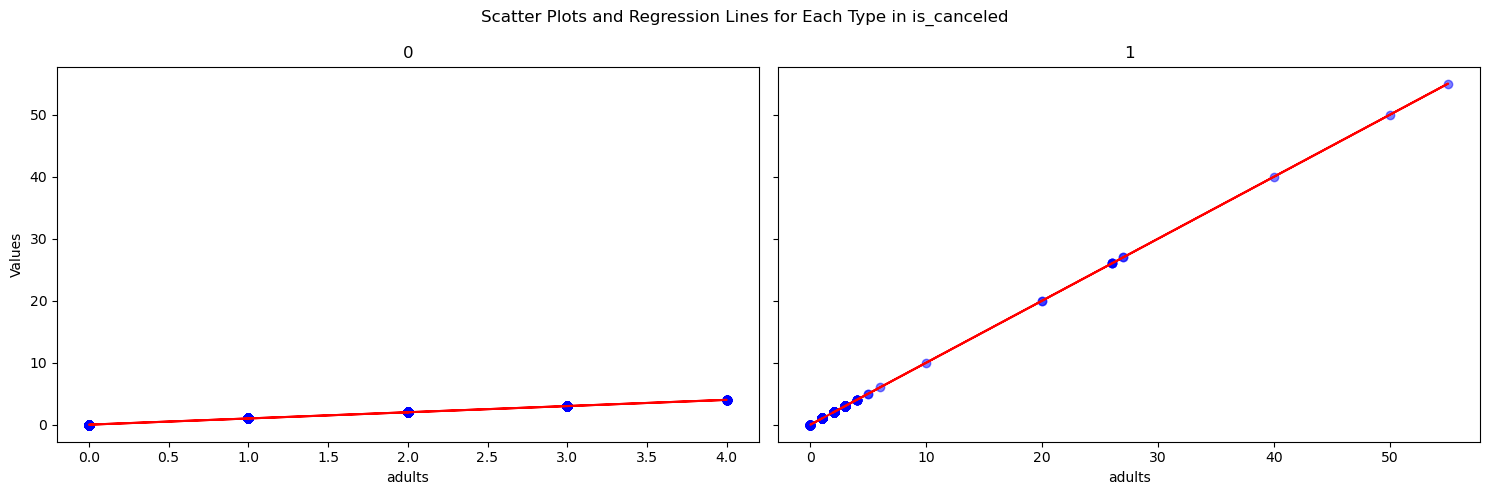

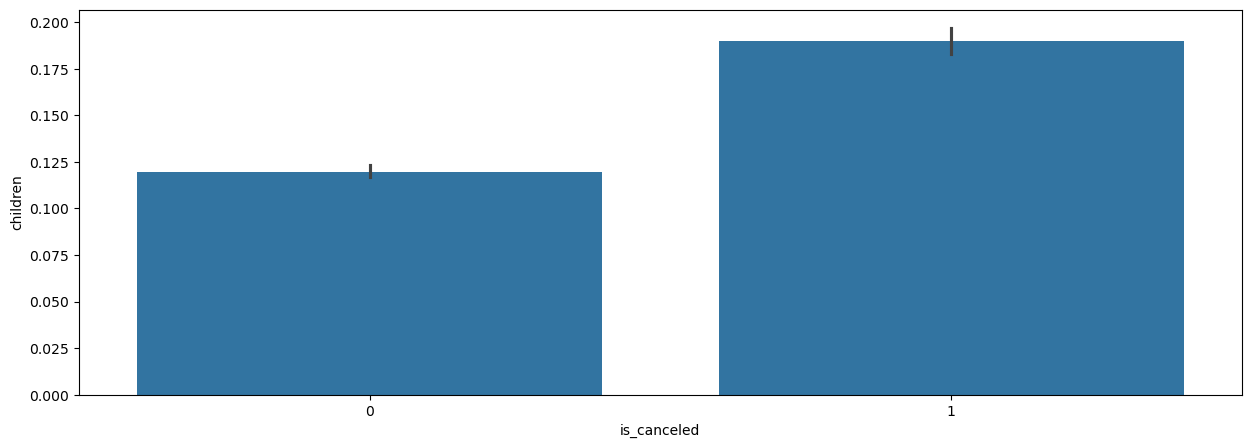

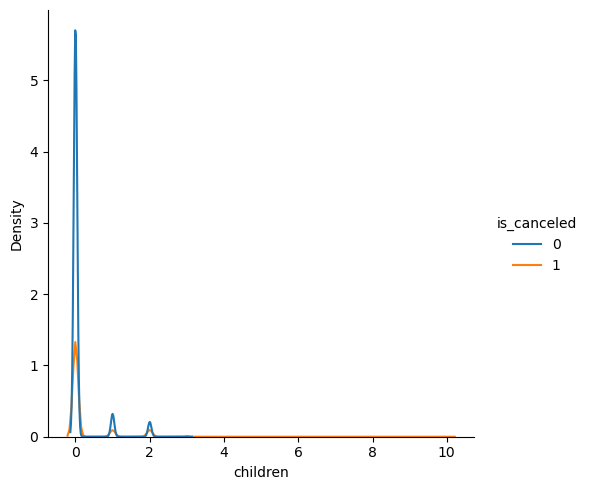

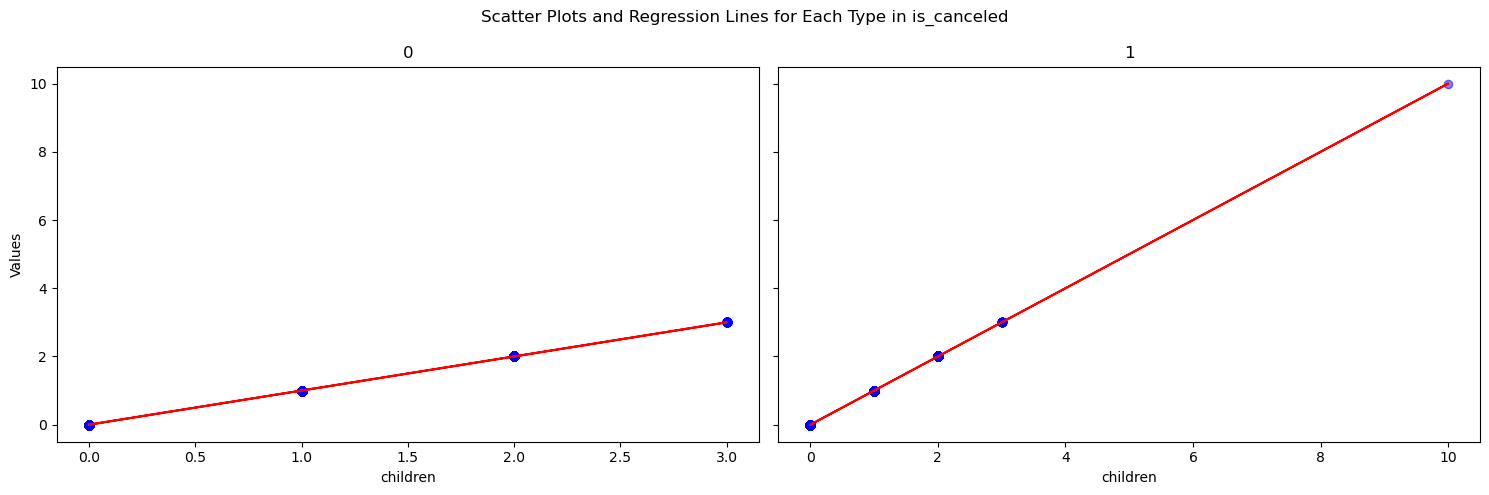

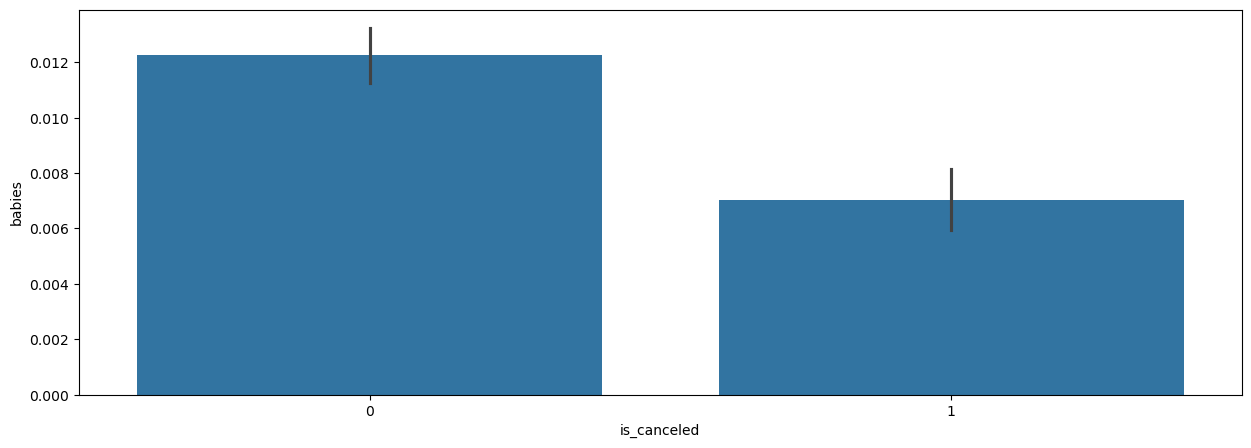

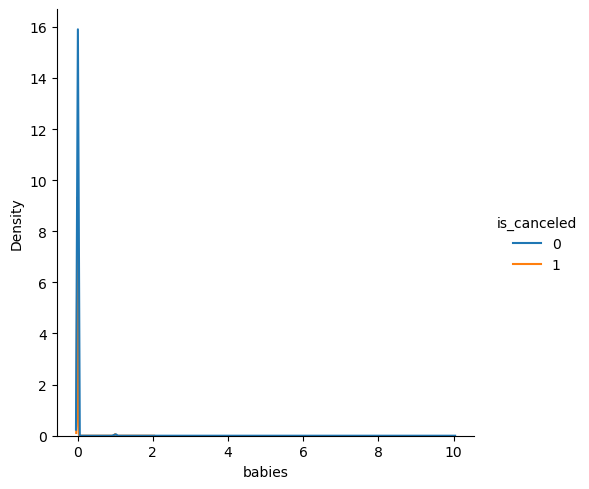

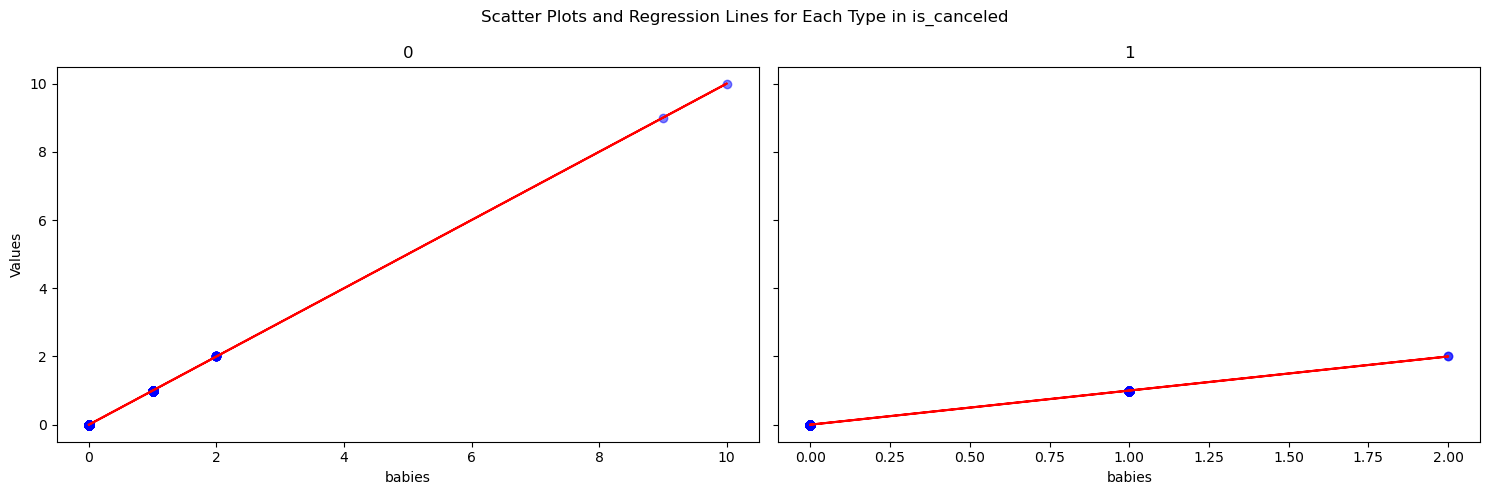

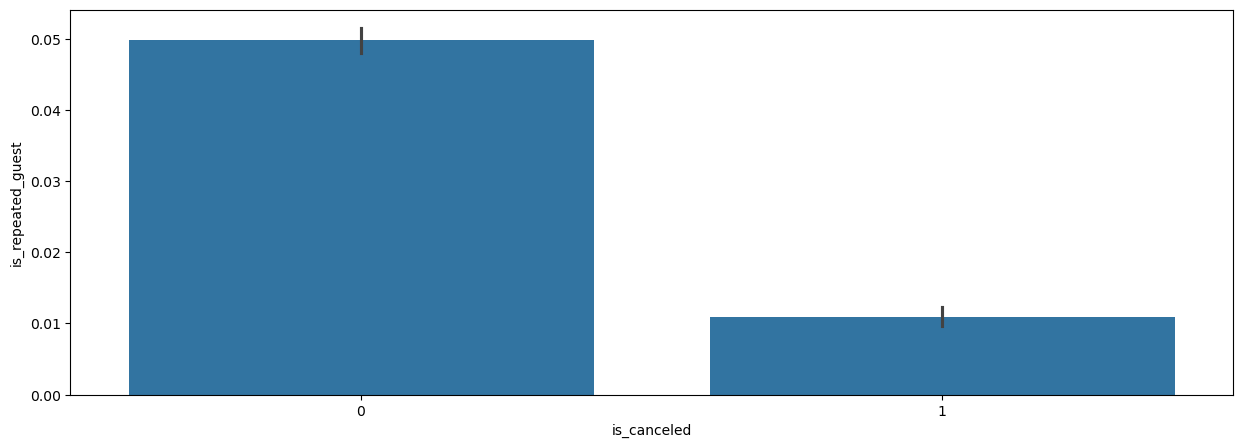

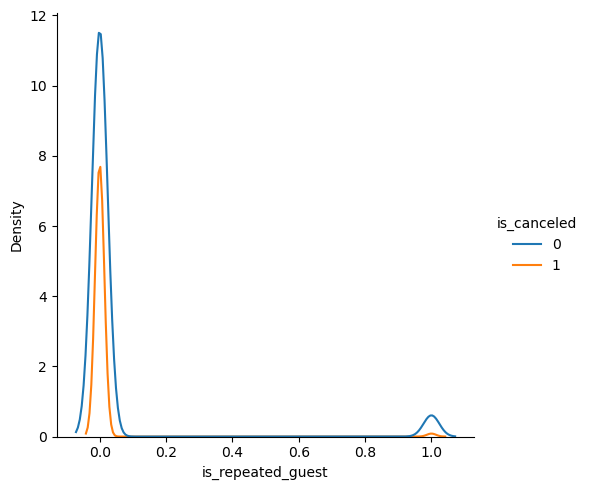

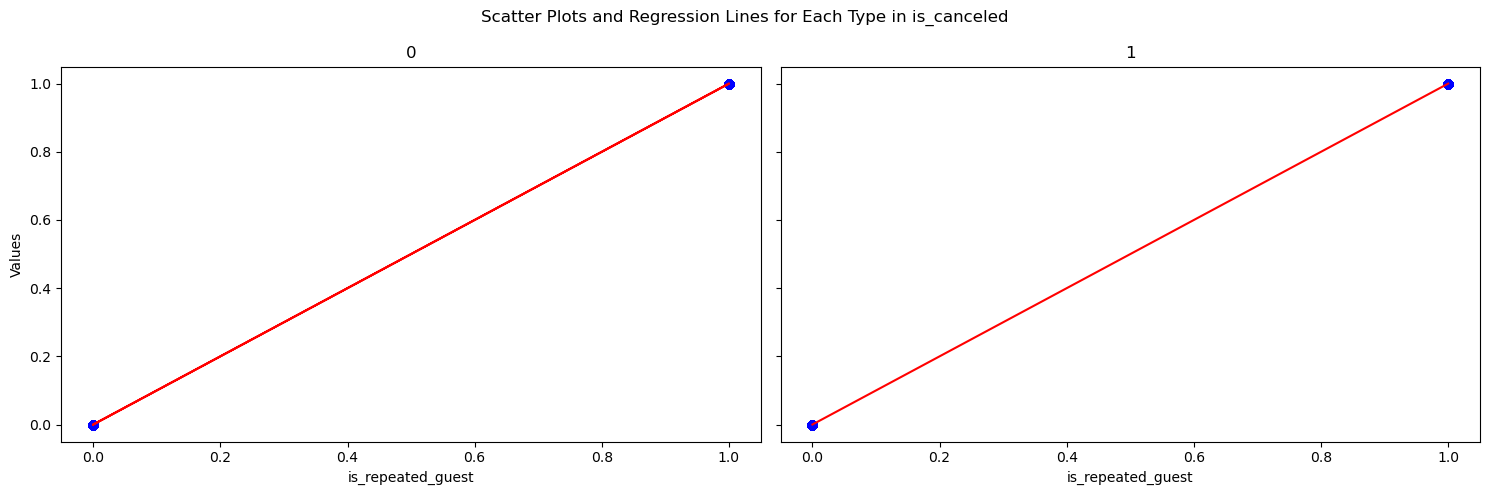

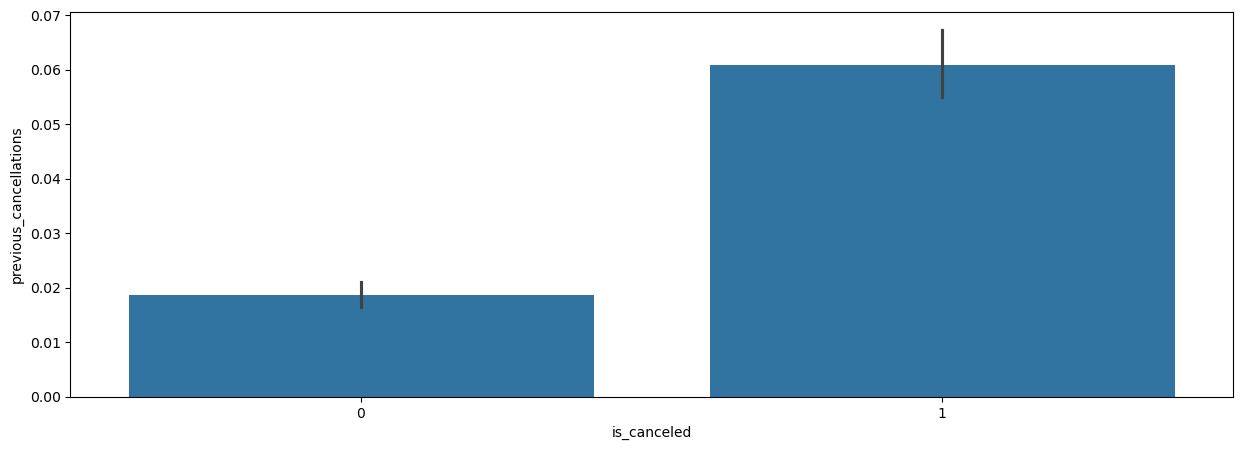

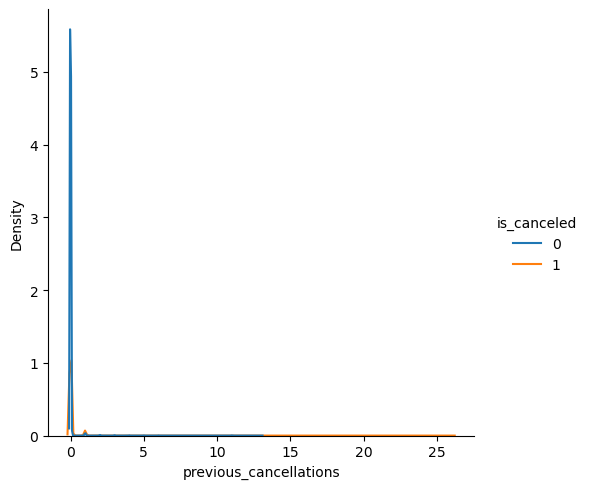

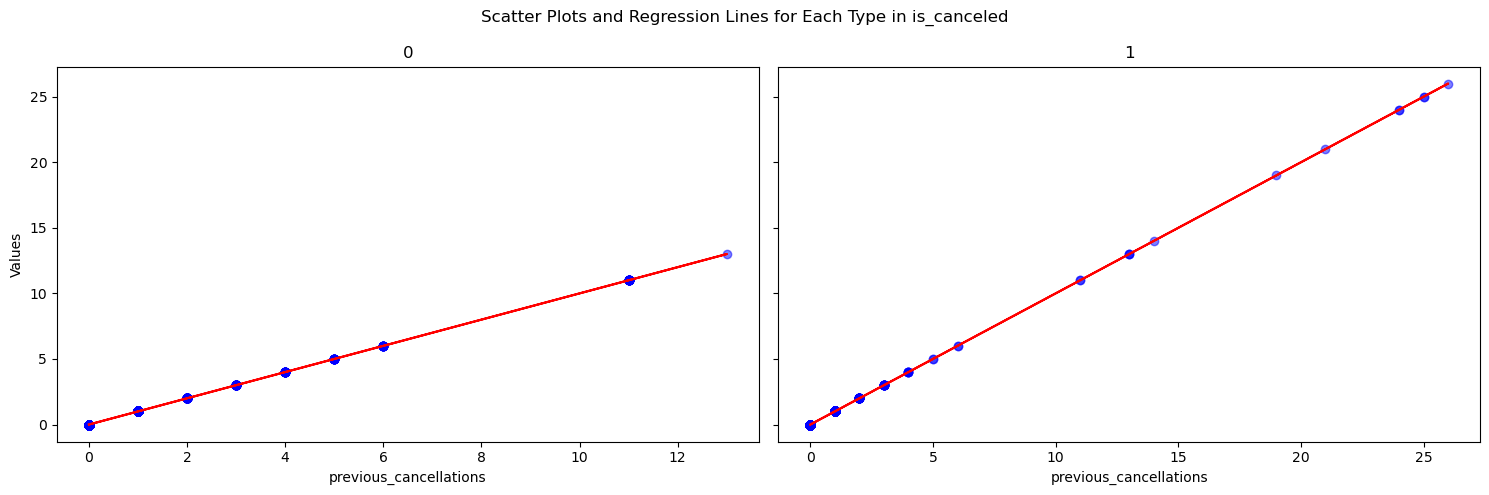

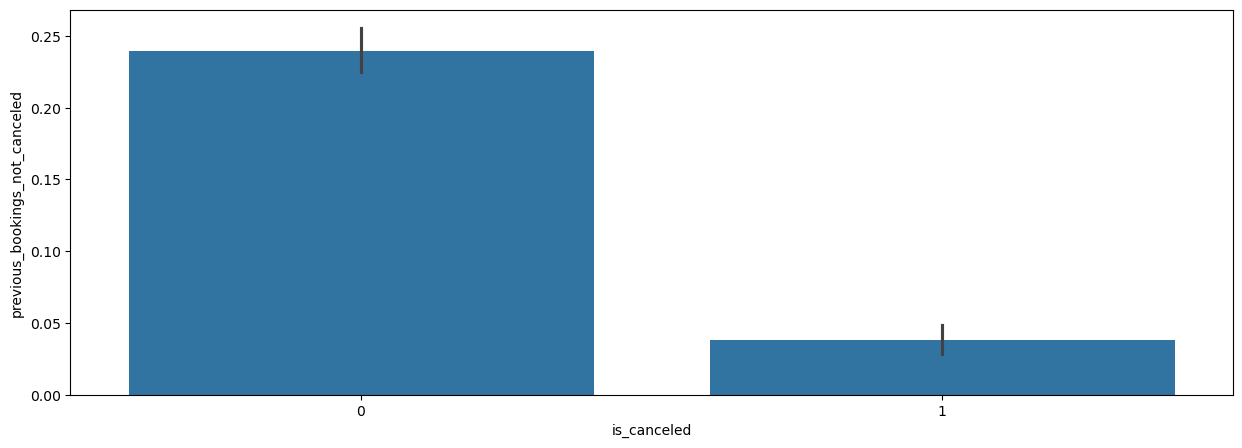

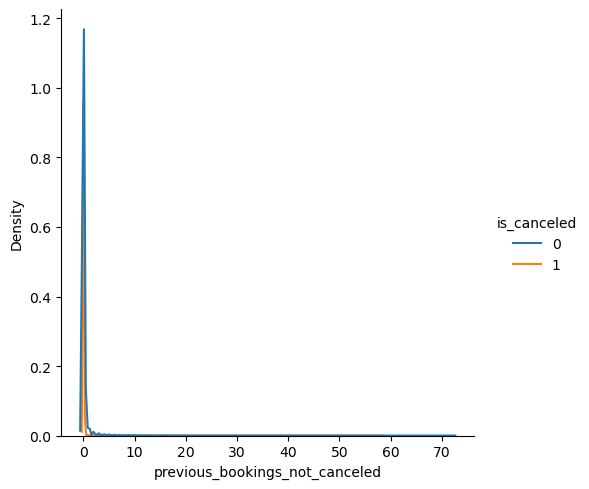

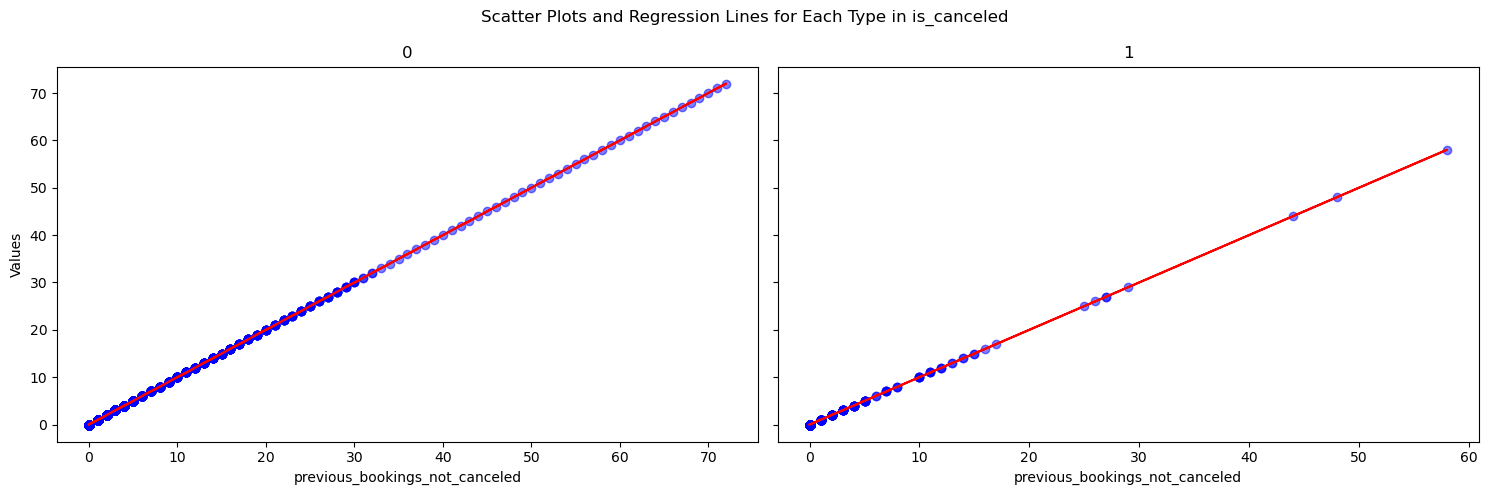

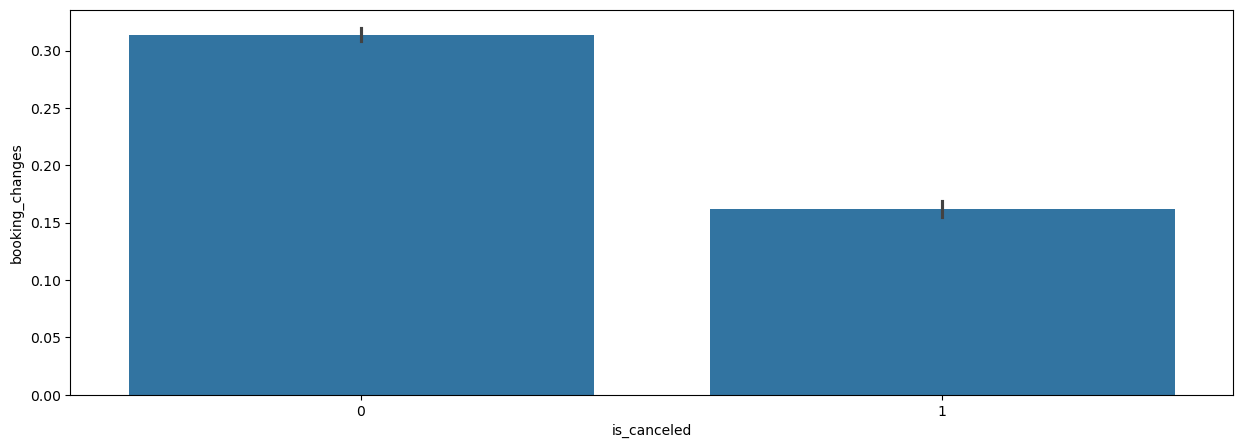

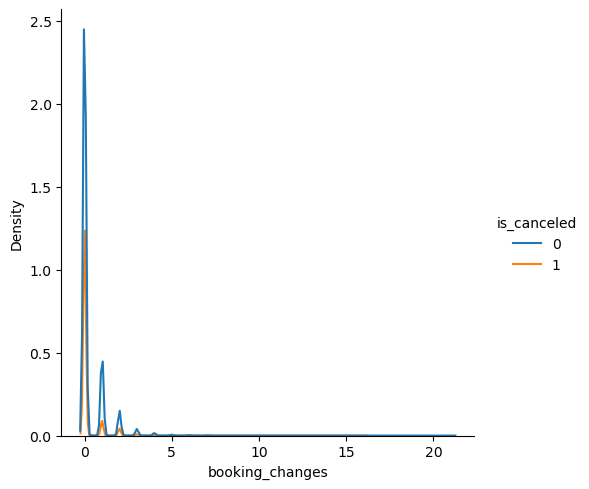

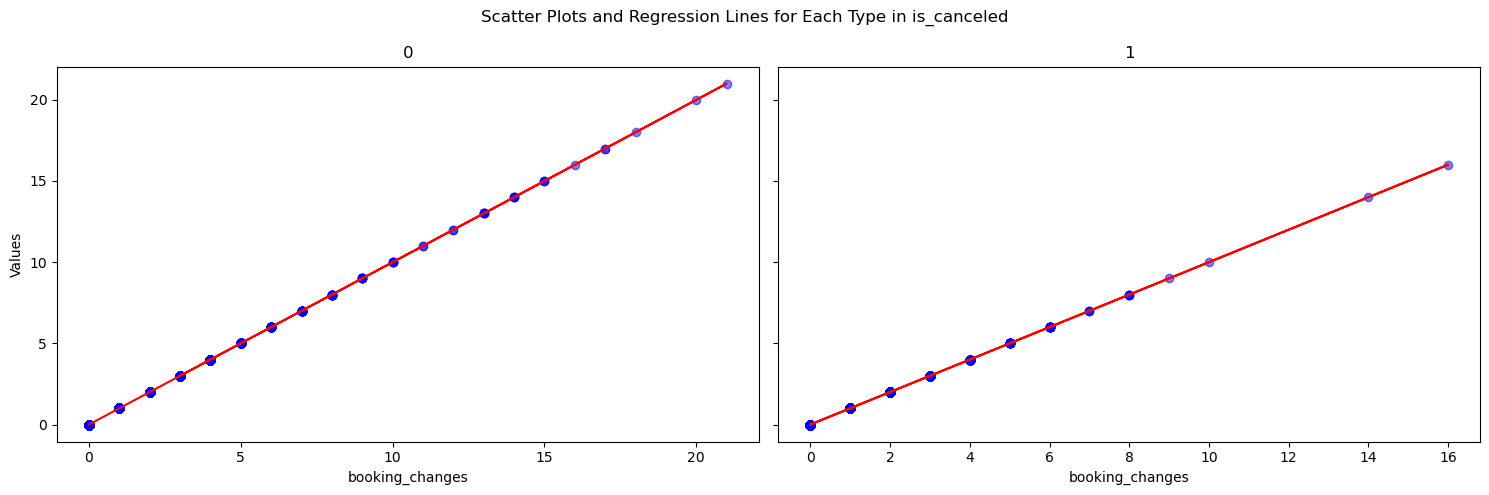

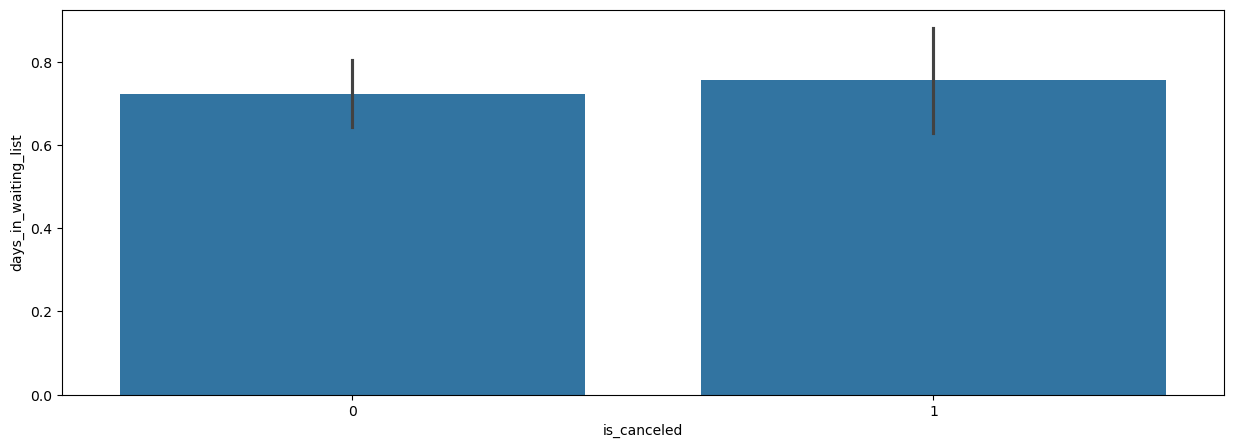

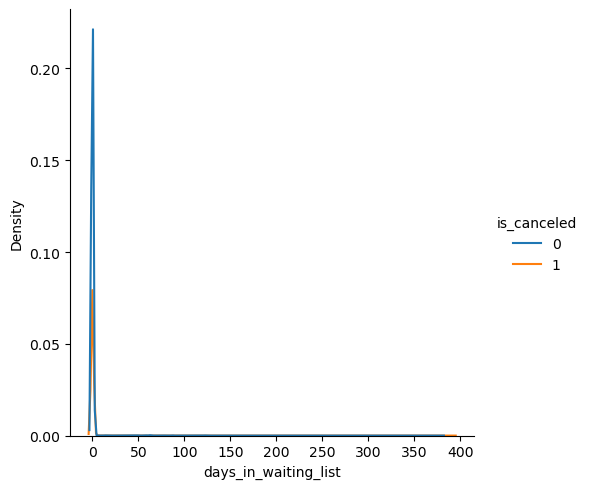

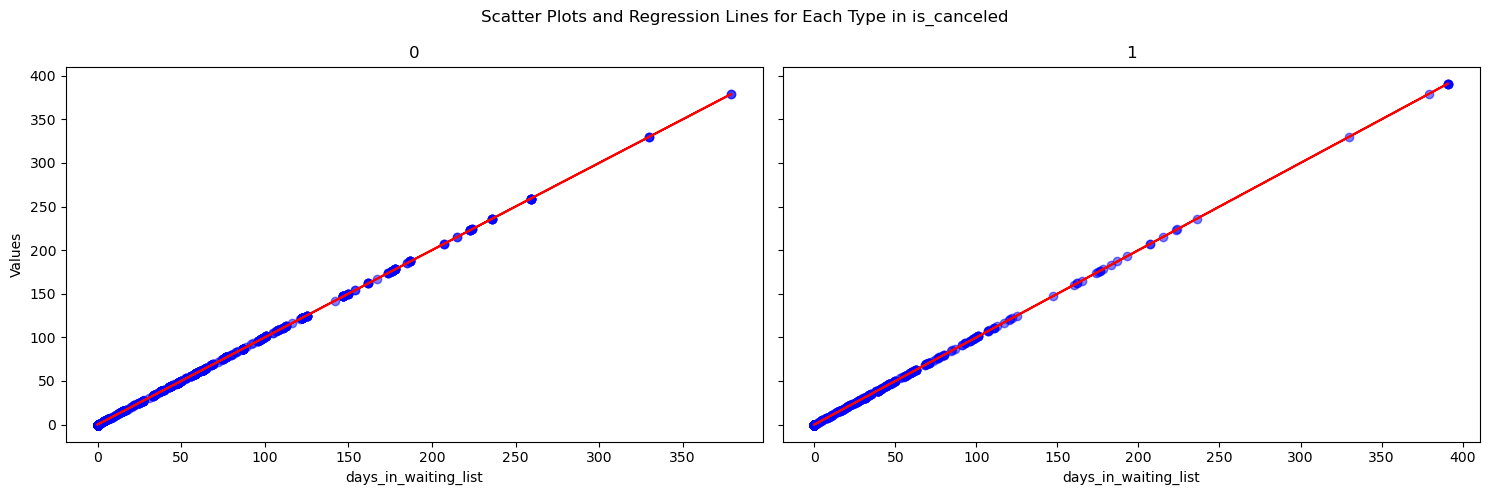

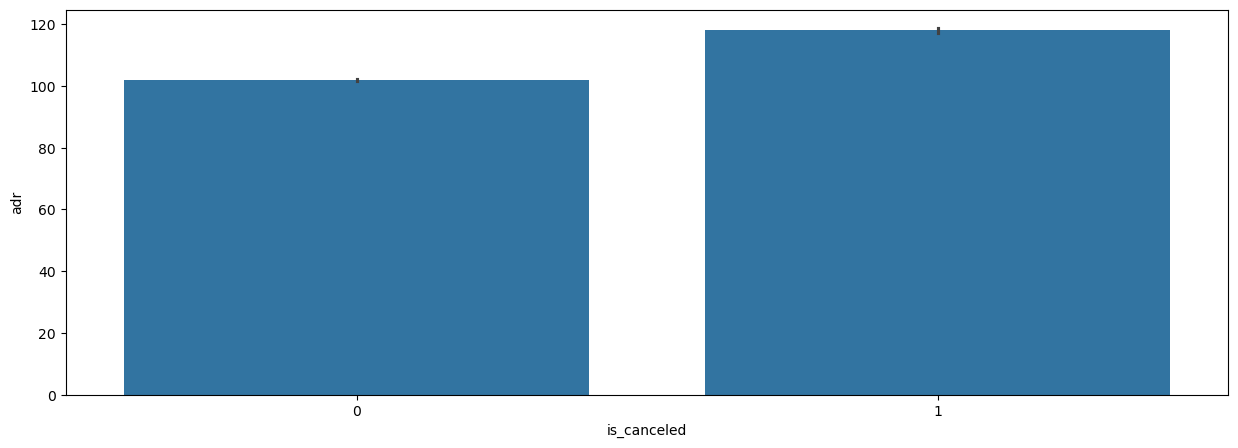

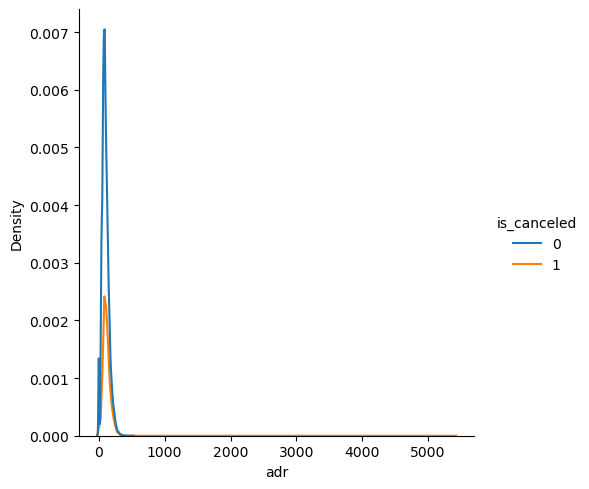

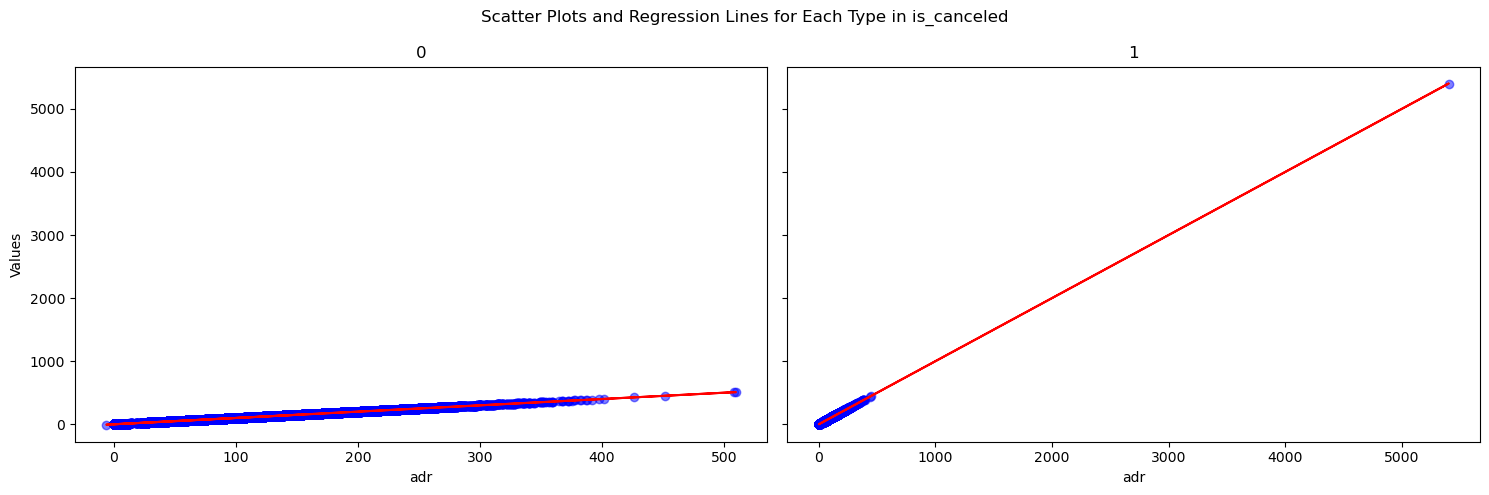

C:\Users\afons\AppData\Local\Temp\ipykernel_9392\4075154613.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")


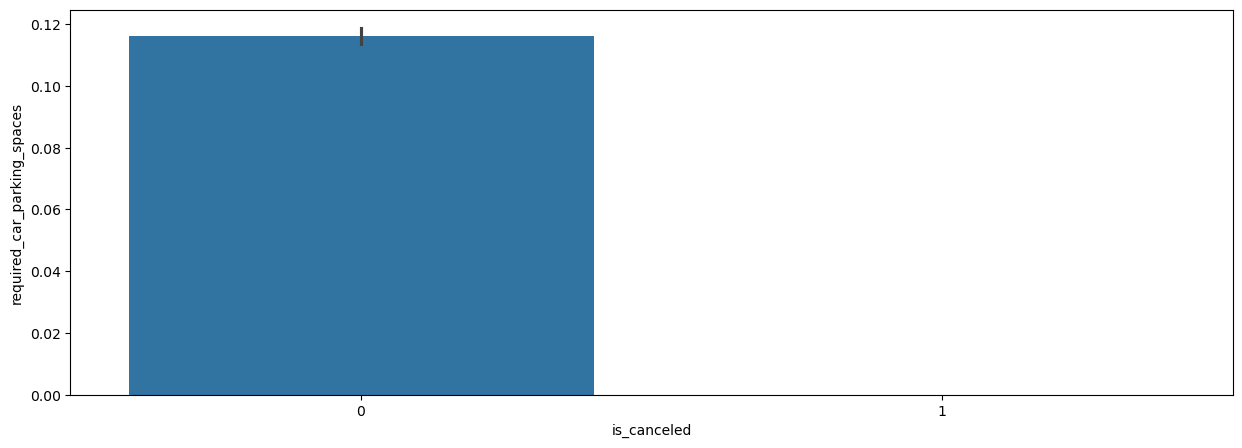

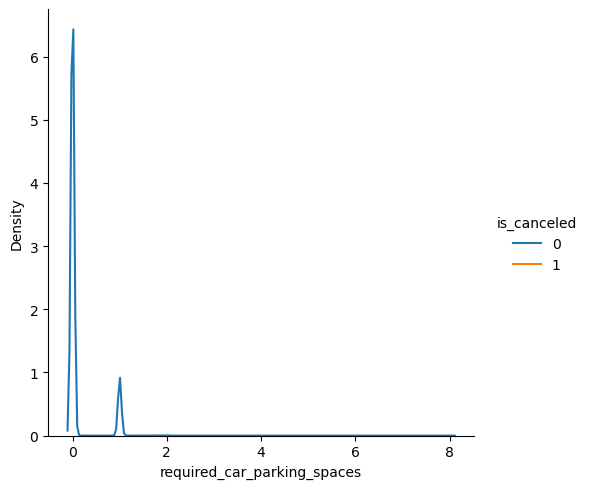

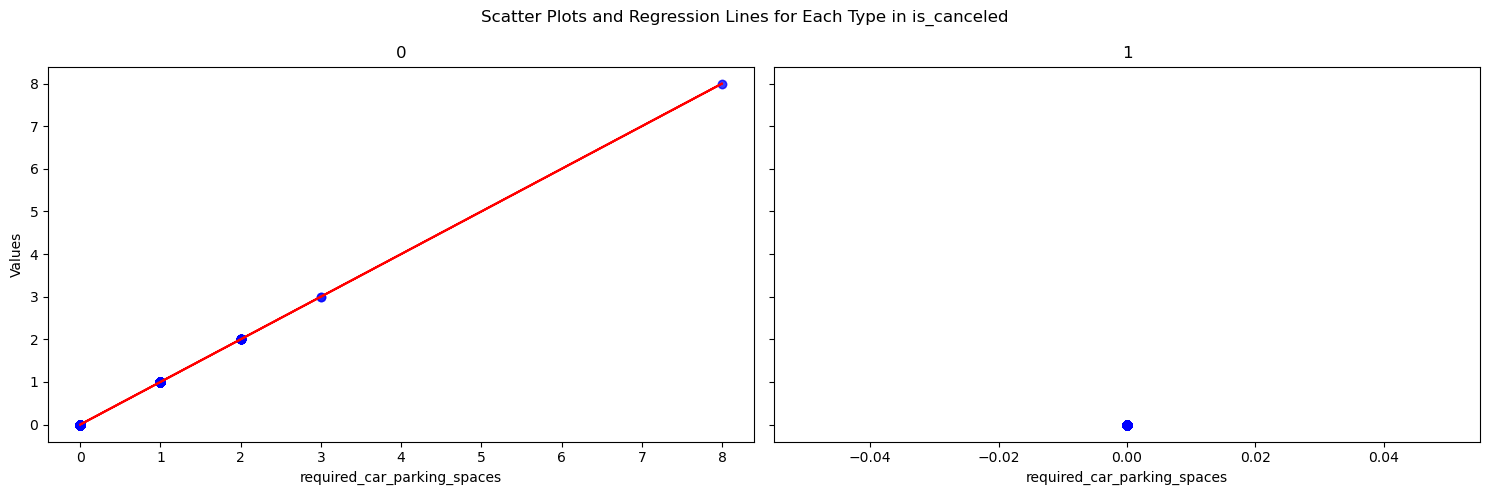

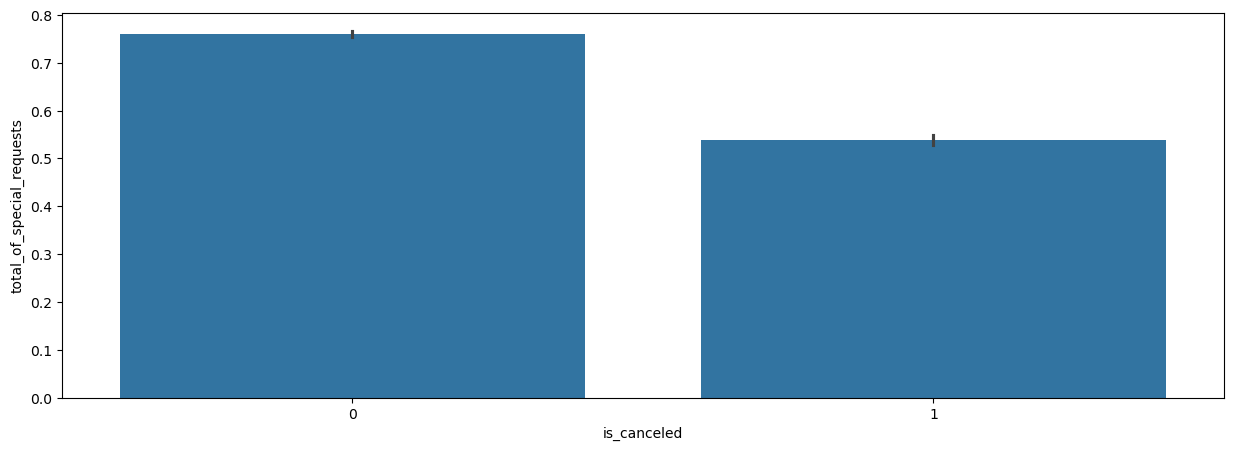

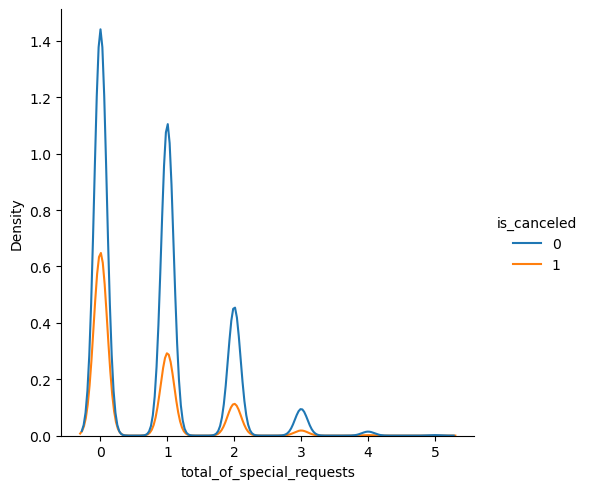

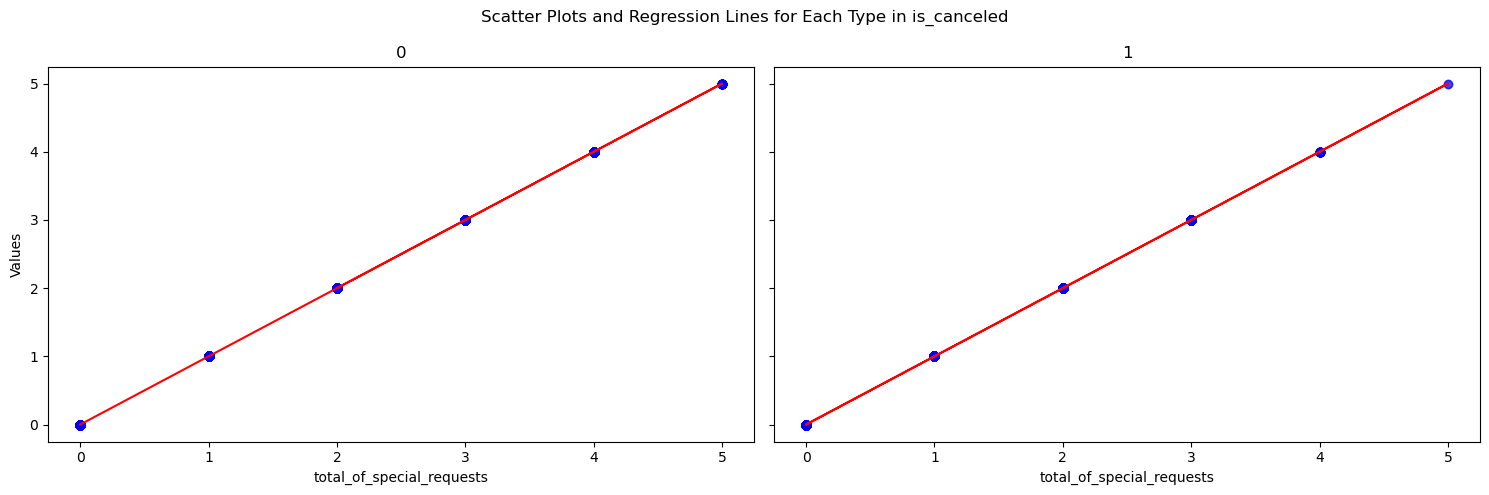

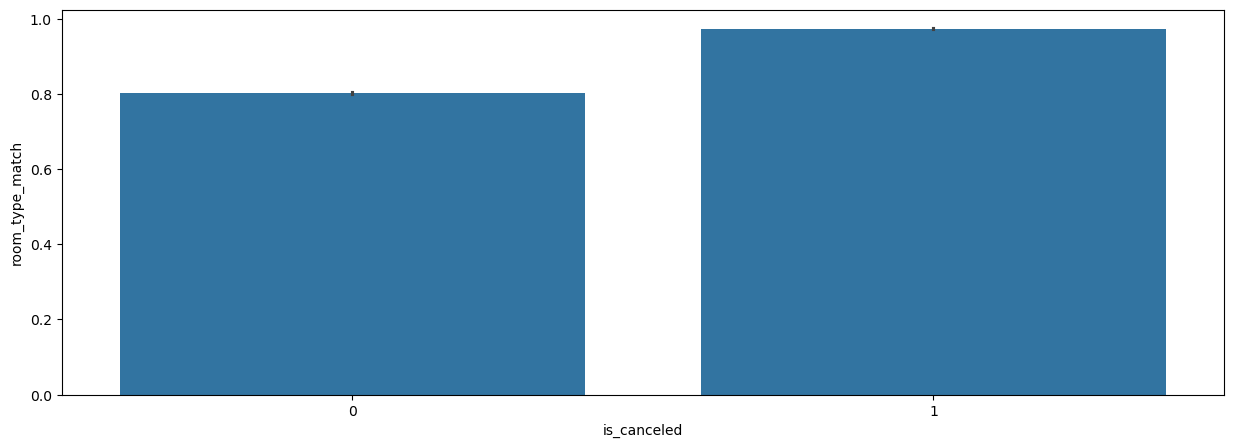

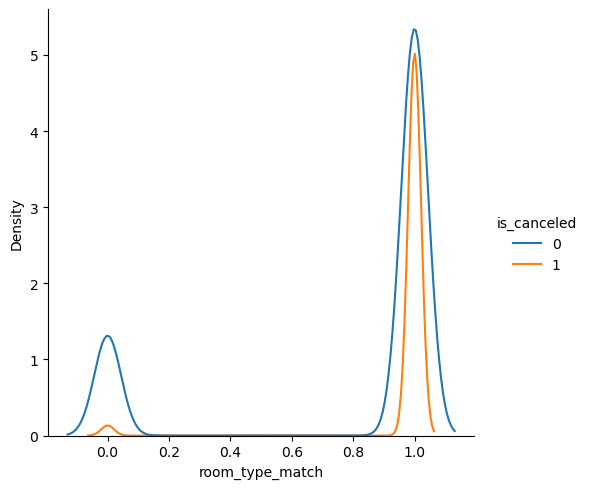

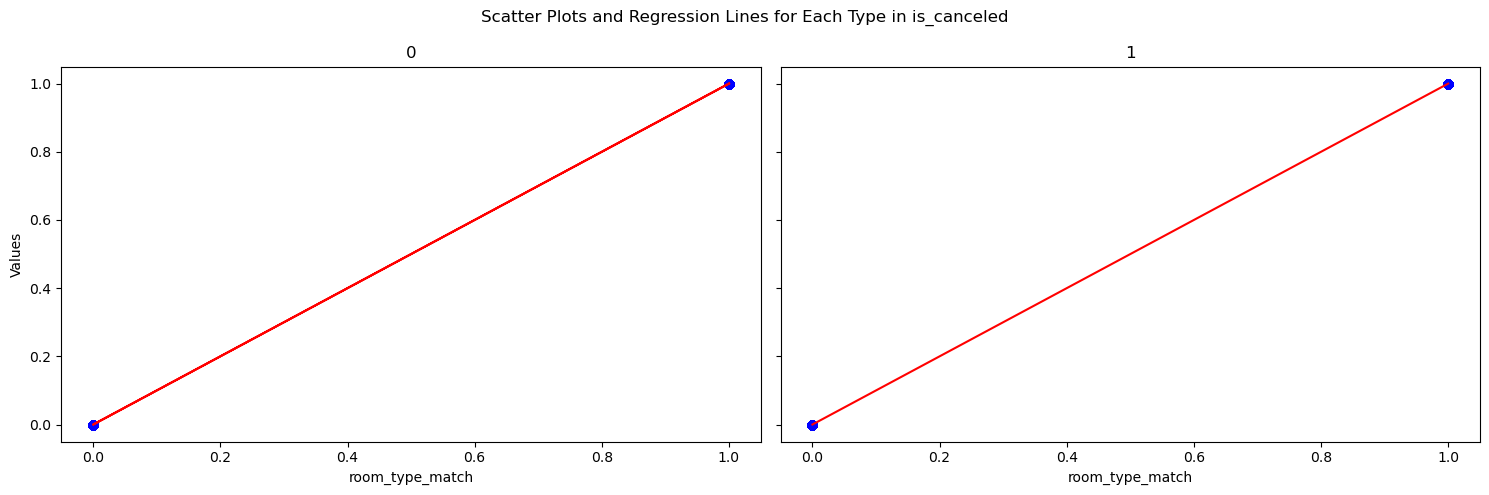

In [12]:
# Passo 2: Univariate Analysis (Distribution of individual features)
def bivariate_analysis(data, column_name):
    Objective_col = data.columns[1]

    # Visualization
    plt.figure(figsize=(15, 5))

    sns.barplot(data=data, x=Objective_col, y=column_name)
   # plt.savefig(f'bivariate_analysis/bar_plot_{column_name}.png')

    sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")
    #plt.savefig(f'bivariate_analysis/dis_plot_kde_{column_name}.png')

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    # Get unique values in the last_col (your categorical variable)
    unique_types = data[Objective_col].unique()

   
   # Loop over each unique type and perform linear regression
    for i, t in enumerate(unique_types):
        # Filter data for the current type
        subset = data[data[Objective_col] == t]
        
        X = subset[column_name].values.reshape(-1, 1)
        y = subset[column_name].values
        model = LinearRegression()
        model.fit(X, y)
        
        m = model.coef_[0]
        b = model.intercept_
        
        axes[i].scatter(X, y, color='blue', alpha=0.5)
        
        axes[i].plot(X, model.predict(X), color='red', label=f'y = {m:.2f}x + {b:.2f}')
        
        # Set the title to show the current type and regression equation
        axes[i].set_title(f'{t}')
        axes[i].set_xlabel(column_name)

    # Set the common ylabel for the whole figure
    axes[0].set_ylabel('Values')

    # Display the plot
    plt.suptitle(f'Scatter Plots and Regression Lines for Each Type in {Objective_col}')
 

    plt.tight_layout()
    #plt.savefig(f'bivariate_analysis/scatter_plot_{column_name}.png')
    plt.show()

variables_to_analyse = numerical_columns
variables_to_analyse = [col for col in variables_to_analyse if col != 'is_canceled']
# Realizar a análise bivariada para cada variável
for variable in variables_to_analyse:
    bivariate_analysis(data, variable)

In [13]:
# Get the number of unique values for categorical columns
unique_values_per_categorical_column = data[categorical_columns].nunique()

# Print the result
print(unique_values_per_categorical_column)

# Function to display the counts of is_canceled for each unique value in the column
def display_cancellation_counts(data, column, top_n=10):
    unique_vals = data[column].nunique()
    
    # Group by the column and the 'is_canceled' column, and count occurrences
    grouped = data.groupby([column, 'is_canceled']).size().unstack(fill_value=0)
    
    if unique_vals <= top_n:
        # If the number of unique values is small, show all counts
        print(f"\nColumn: {column}")
        print(grouped)
    else:
        # If there are many unique values, show the top N values based on their total counts
        top_values = data[column].value_counts().head(top_n).index
        print(f"\nColumn: {column} (Top {top_n} out of {unique_vals} unique values)")
        print(grouped.loc[top_values])

# Apply the function for each column except 'is_canceled'
for column in categorical_columns:
     display_cancellation_counts(data, column)

hotel                     2
arrival_date_month       12
meal                      5
country                 178
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
origin_reservasion        3
dtype: int64

Column: hotel
is_canceled       0      1
hotel                     
City Hotel    37371  15872
Resort Hotel  25984   7890

Column: arrival_date_month (Top 10 out of 12 unique values)
is_canceled            0     1
arrival_date_month            
August              7633  3601
July                6857  3178
May                 5911  2404
April               5498  2380
June                5411  2332
March               5681  1814
October             5292  1619
September           5046  1609
February            4682  1401
December            3751  1362

Column: meal
is_canceled      0      1
meal                     
BB           49918  17850
FB             260     93
HB   

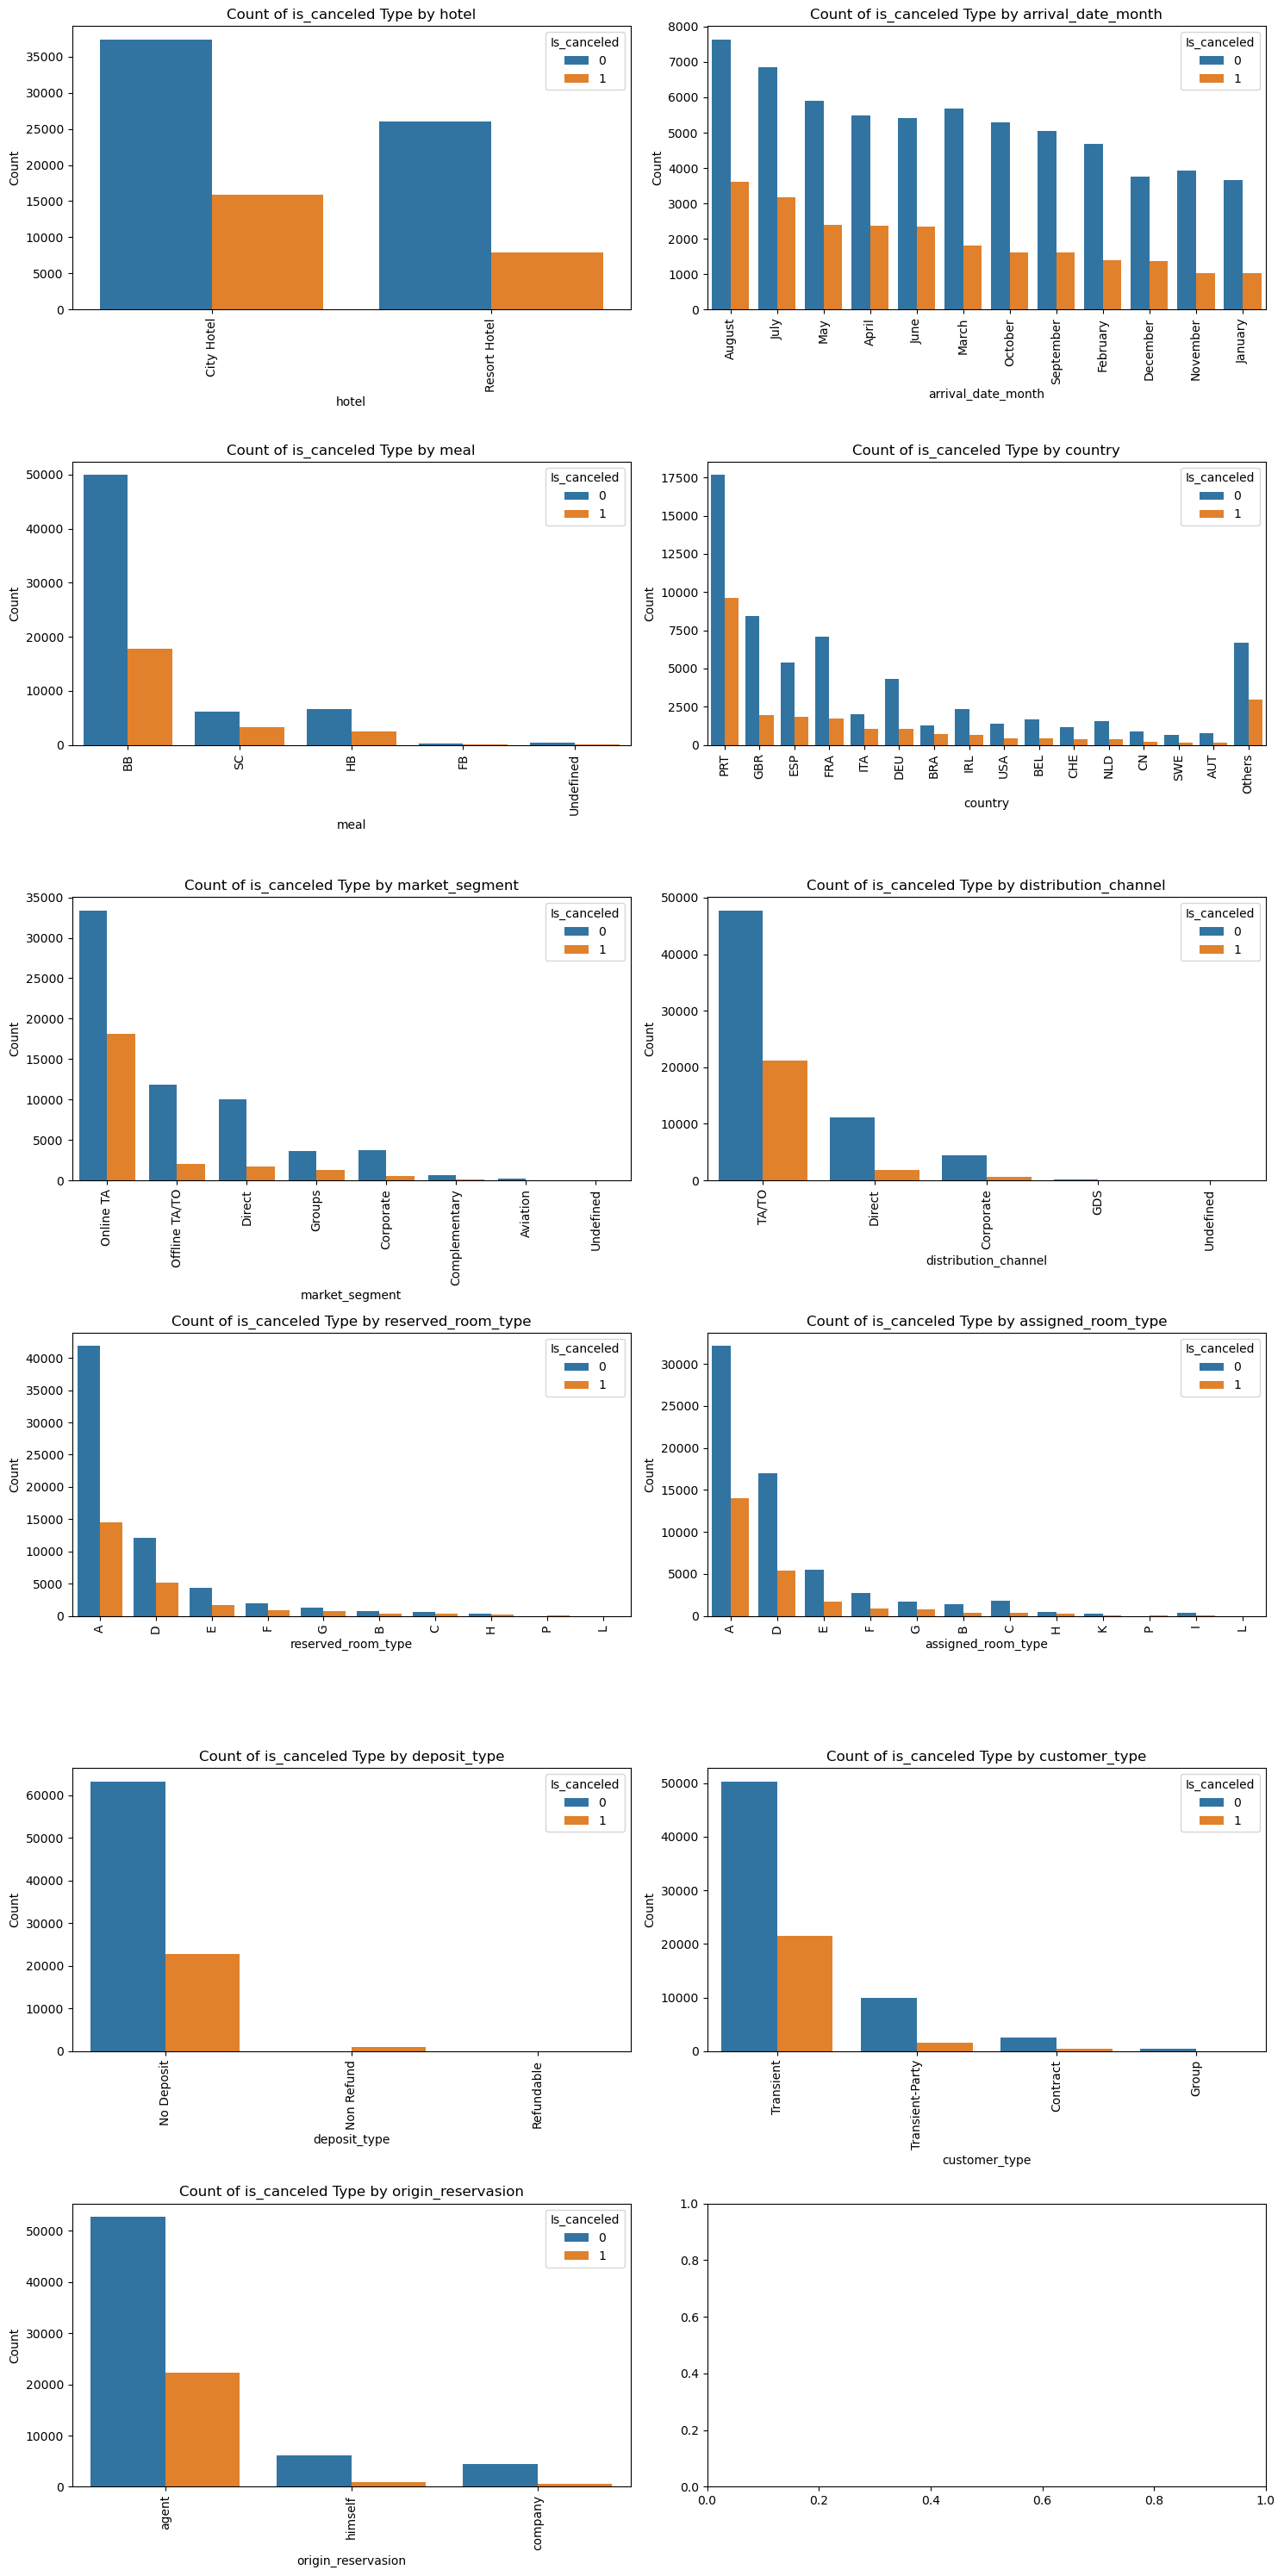

In [14]:
import math

def bivariate_categorical(data, categorical_columns):
    # Configuração para organizar gráficos lado a lado
    n_cols = 2  # Número de colunas (ajuste conforme necessário)
    n_rows = math.ceil(len(categorical_columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Ajuste o tamanho

    for idx, variable in enumerate(categorical_columns):
        # Verificar o número de categorias únicas na variável
        unique_values = data[variable].nunique()

        if unique_values > 15:
            # Agrupar as 15 categorias mais comuns e somar o restante em "Others"
            top_15 = data[variable].value_counts().nlargest(15).index
            data[variable] = data[variable].apply(lambda x: x if x in top_15 else 'Others')
        
        # Ordenar categorias pela contagem de is_canceled == 1 e colocar "Others" no final
        order = data[data['is_canceled'] == 1][variable].value_counts().index.tolist()
        if 'Others' in data[variable].unique():
            order = [x for x in order if x != 'Others'] + ['Others']

        # Selecionar o eixo do subplot
        ax = axes[idx // n_cols, idx % n_cols] if n_rows > 1 else axes[idx % n_cols]

        # Plotar gráfico com sns.countplot
        sns.countplot(data=data, x=variable, hue='is_canceled', order=order, ax=ax)
        
        # Adicionar labels e título
        ax.set_xlabel(variable)
        ax.set_ylabel('Count')
        ax.set_title(f'Count of is_canceled Type by {variable}')
        ax.legend(title='Is_canceled')
        
        ax.tick_params(axis='x', rotation=90)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

# Chamar a função para visualização
bivariate_categorical(data, categorical_columns)


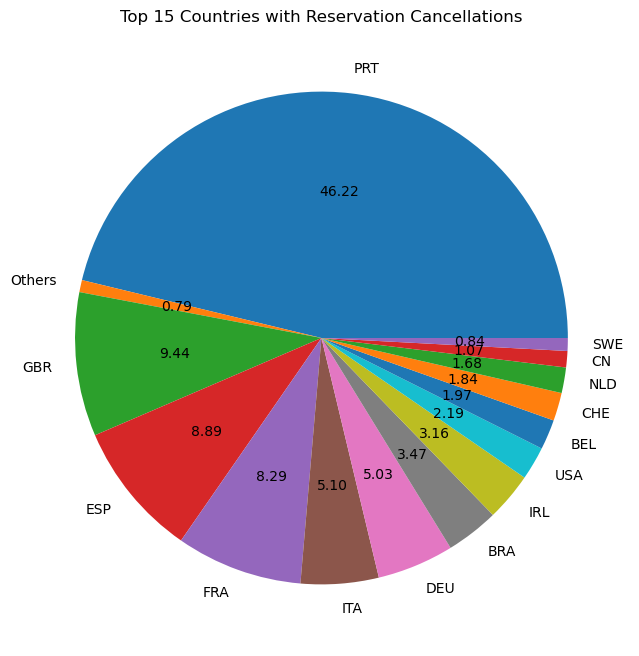

In [15]:
# Selecionar os dados onde houve cancelamento
cancelled_data = data[data['is_canceled'] == 1]

# Contagem de cancelamentos por país
country_counts = cancelled_data['country'].value_counts()

# Selecionar os 15 principais países
top_15_countries = country_counts[:15]
# Somar as ocorrências dos países restantes e adicionar como "Others"
others = country_counts[15:].sum()
top_15_countries['Others'] = others

# Visualização
plt.figure(figsize=(8, 8))
plt.title('Top 15 Countries with Reservation Cancellations', color="black")
plt.pie(top_15_countries, autopct='%.2f', labels=top_15_countries.index)
plt.show()